# Contrast Intervention Diagnostics

Analyze `results.json` from `run_contrast_intervention.py` without rerunning inference.

In [1]:
import json, numpy as np, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Base instruct

# RESULTS_JSON_PATH = Path("outputs/8b_instruct_entropy/inter_contrast_causality/Llama-3.1-8B-Instruct_contrast_intervention_entropy_vs_confidence_results.json") 
# DIRECTION_ENTROPY_PATH = Path("outputs/8b_instruct_entropy/Llama-3.1-8B-Instruct_TriviaMC_mc_entropy_directions.npz")   
# DIRECTION_CONF_PATH   = Path("outputs/8b_instruct_entropy/confidence_contrast/Llama-3.1-8B-Instruct_TriviaMC_confidence_contrast_directions.pt")  

# # Paths to activation NPZ files (no interventions - just plain forward passes)
# MC_ACTS_NPZ = Path("outputs/8b_instruct_entropy/Llama-3.1-8B-Instruct_TriviaMC_mc_activations.npz")
# CONF_ACTS_NPZ = Path("outputs/8b_instruct_entropy/Llama-3.1-8B-Instruct_TriviaMC_transfer_confidence_activations.npz")


# Finetuned

RESULTS_JSON_PATH = Path("outputs/8b_FT_entropy/inter_contrast_causality_2/Llama-3.1-8B-Instruct_contrast_intervention_entropy_vs_confidence_results.json") 
DIRECTION_ENTROPY_PATH = Path("outputs/8b_FT_entropy/Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_mc_entropy_directions.npz")   
DIRECTION_CONF_PATH   = Path("outputs/8b_FT_entropy/confidence_contrast/Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_confidence_contrast_directions.pt")  

# Paths to activation NPZ files (no interventions - just plain forward passes)
MC_ACTS_NPZ = Path("outputs/8b_FT_entropy/Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_mc_activations.npz")
CONF_ACTS_NPZ = Path("outputs/8b_FT_entropy/Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_transfer_confidence_activations.npz")


results = json.loads(RESULTS_JSON_PATH.read_text())
config = results.get("config", {})
print("Model:", config.get("model"))
print("Adapter:", config.get("adapter"))
print("Num questions:", config.get("num_questions"))

Model: meta-llama/Llama-3.1-8B-Instruct
Adapter: Tristan-Day/ect_20251222_215412_v0uei7y1_2000
Num questions: 100


In [2]:
def per_layer_df(section: dict, prefix: str) -> pd.DataFrame:
    per_layer = section.get("per_layer", {})
    rows = []
    for layer_str, d in per_layer.items():
        row = {"layer": int(layer_str)}
        row.update(d)
        rows.append(row)
    df = pd.DataFrame(rows).sort_values("layer").reset_index(drop=True)
    return df.rename(columns={c: f"{prefix}{c}" for c in df.columns if c != "layer"})

df_s = per_layer_df(results.get("steering", {}), "s_")
df_a = per_layer_df(results.get("ablation", {}), "a_")
df = df_s.merge(df_a, on="layer", how="outer").sort_values("layer").reset_index(drop=True)
df.head()

,layer,s_baseline_mc_entropy,s_baseline_conf_signal,s_entropy_direction_mc_entropy_slope,s_entropy_direction_mc_entropy_r2,s_entropy_direction_conf_slope,s_entropy_direction_conf_r2,s_entropy_direction_mc_entropy_delta_pos2,s_entropy_direction_mc_entropy_delta_neg2,s_entropy_direction_conf_delta_pos2,...,s_random_direction_conf_delta_pos2,s_random_direction_conf_delta_neg2,a_baseline_mc_entropy,a_baseline_conf_signal,a_entropy_direction_mc_entropy_delta,a_entropy_direction_conf_delta,a_confidence_direction_mc_entropy_delta,a_confidence_direction_conf_delta,a_random_direction_mc_entropy_delta,a_random_direction_conf_delta
0,0,0.354588,0.893709,0.001009,0.011182,0.003668,0.423041,0.005688,-0.012103,0.005562,...,-0.005641,-0.006057,0.354588,0.893709,0.000156,0.000255,-0.000041,-0.000071,-0.000096,0.000006
1,1,0.354588,0.893709,-0.009642,0.764915,0.005554,0.854730,-0.021053,-0.005351,0.008943,...,-0.000944,-0.001015,0.354588,0.893709,0.001133,-0.000198,-0.000121,-0.000015,0.000124,-0.000009
2,2,0.354588,0.893709,-0.004270,0.593057,0.001349,0.772360,-0.002298,0.008725,0.005700,...,0.001798,-0.003051,0.354588,0.893709,-0.000132,0.000066,-0.000415,0.000103,0.000055,-0.000010
3,3,0.354588,0.893709,-0.000367,0.040279,0.000836,0.700763,-0.007785,-0.001603,0.001847,...,-0.000435,-0.001779,0.354588,0.893709,0.000176,-0.000082,0.000499,0.000319,-0.000053,-0.000015
4,4,0.354588,0.893709,-0.006444,0.912531,0.000618,0.584430,-0.021365,0.007634,0.002394,...,0.001129,-0.000537,0.354588,0.893709,0.001065,-0.000107,-0.000548,0.000317,0.000154,0.000050


In [3]:
baseline_mc = df["s_baseline_mc_entropy"]
baseline_conf = df["s_baseline_conf_signal"]

df["rel_s_entropy_to_mc"] = df["s_entropy_direction_mc_entropy_slope"] / baseline_mc
df["rel_s_entropy_to_conf"] = df["s_entropy_direction_conf_slope"] / baseline_conf
df["rel_s_conf_to_mc"] = df["s_confidence_direction_mc_entropy_slope"] / baseline_mc
df["rel_s_conf_to_conf"] = df["s_confidence_direction_conf_slope"] / baseline_conf

df["rel_a_entropy_to_mc"] = df["a_entropy_direction_mc_entropy_delta"] / baseline_mc
df["rel_a_entropy_to_conf"] = df["a_entropy_direction_conf_delta"] / baseline_conf
df["rel_a_conf_to_mc"] = df["a_confidence_direction_mc_entropy_delta"] / baseline_mc
df["rel_a_conf_to_conf"] = df["a_confidence_direction_conf_delta"] / baseline_conf

df[["layer","rel_s_entropy_to_mc","rel_s_entropy_to_conf","rel_s_conf_to_mc","rel_s_conf_to_conf"]].head()

,layer,rel_s_entropy_to_mc,rel_s_entropy_to_conf,rel_s_conf_to_mc,rel_s_conf_to_conf
0,0,0.002844,0.004104,0.036548,-0.004993
1,1,-0.027193,0.006215,0.000576,-0.000271
2,2,-0.012043,0.001509,0.001288,0.000257
3,3,-0.001035,0.000936,-0.013286,-0.001235
4,4,-0.018173,0.000692,0.011912,-0.001756


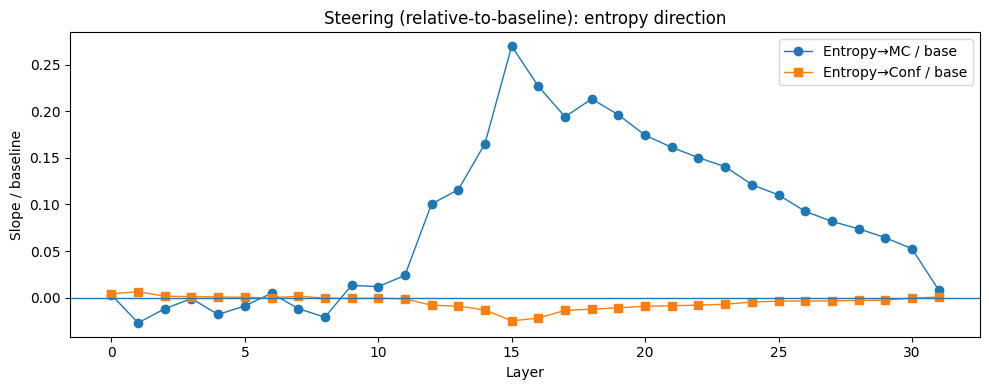

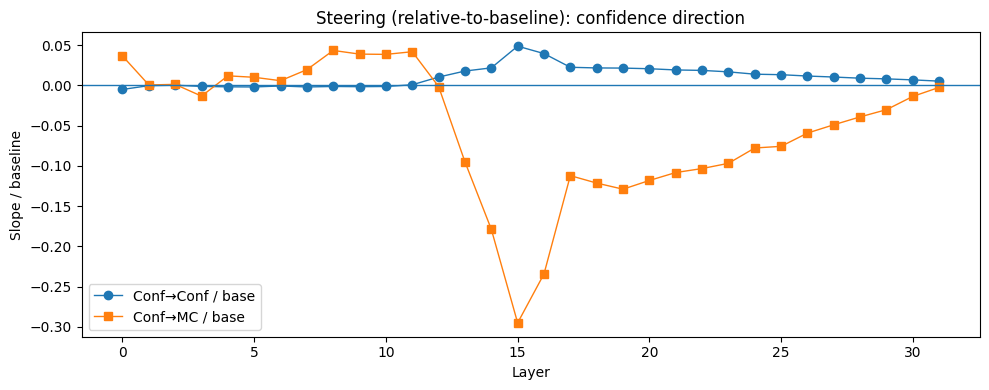

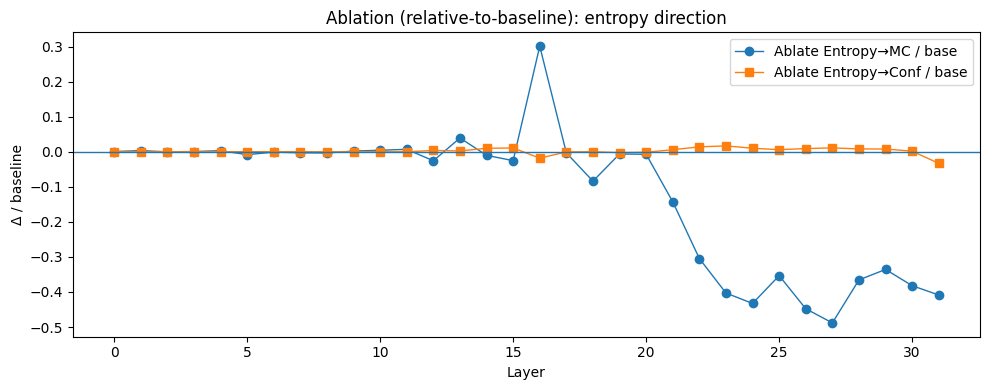

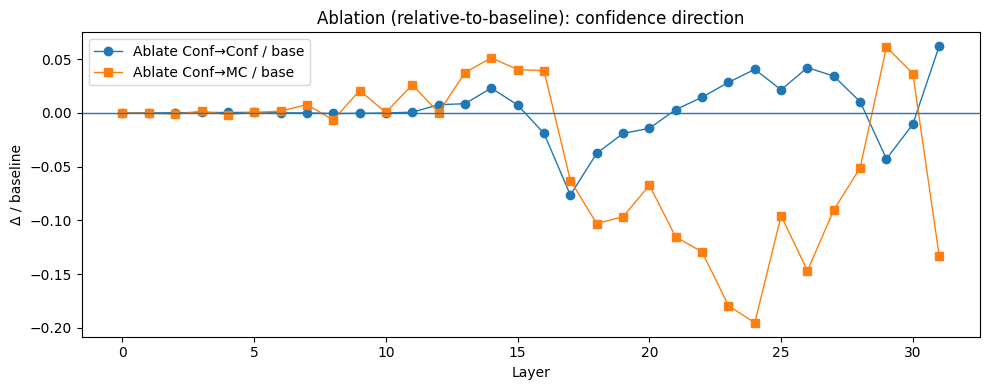

In [4]:
def plot_lines(title, ylab, *series):
    plt.figure(figsize=(10,4))
    for y, label, marker in series:
        plt.plot(df["layer"], y, marker=marker, linewidth=1, label=label)
    plt.axhline(0, linewidth=1)
    plt.title(title)
    plt.xlabel("Layer")
    plt.ylabel(ylab)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_lines("Steering (relative-to-baseline): entropy direction", "Slope / baseline",
           (df["rel_s_entropy_to_mc"], "Entropy→MC / base", "o"),
           (df["rel_s_entropy_to_conf"], "Entropy→Conf / base", "s"))

plot_lines("Steering (relative-to-baseline): confidence direction", "Slope / baseline",
           (df["rel_s_conf_to_conf"], "Conf→Conf / base", "o"),
           (df["rel_s_conf_to_mc"], "Conf→MC / base", "s"))

plot_lines("Ablation (relative-to-baseline): entropy direction", "Δ / baseline",
           (df["rel_a_entropy_to_mc"], "Ablate Entropy→MC / base", "o"),
           (df["rel_a_entropy_to_conf"], "Ablate Entropy→Conf / base", "s"))

plot_lines("Ablation (relative-to-baseline): confidence direction", "Δ / baseline",
           (df["rel_a_conf_to_conf"], "Ablate Conf→Conf / base", "o"),
           (df["rel_a_conf_to_mc"], "Ablate Conf→MC / base", "s"))

In [5]:
# Optional: norm-normalize by loading saved direction files (no inference rerun)
direction_norms_loaded = False
try:
    import torch
    if DIRECTION_ENTROPY_PATH.exists() and DIRECTION_CONF_PATH.exists():
        npz = np.load(DIRECTION_ENTROPY_PATH, allow_pickle=True)
        ent_dirs = npz["directions"] if "directions" in npz else None

        obj = torch.load(DIRECTION_CONF_PATH, map_location="cpu")
        if isinstance(obj, dict):
            conf_dirs = np.stack([obj[l].detach().cpu().numpy() for l in sorted(obj.keys())], axis=0)
        else:
            conf_dirs = obj.detach().cpu().numpy()

        if ent_dirs is not None and ent_dirs.shape[0] == len(df) and conf_dirs.shape[0] == len(df):
            df["entropy_dir_norm"] = np.linalg.norm(ent_dirs, axis=1)
            df["conf_dir_norm"] = np.linalg.norm(conf_dirs, axis=1)
            df["norm_s_entropy_to_conf"] = df["s_entropy_direction_conf_slope"] / df["entropy_dir_norm"]
            df["norm_s_conf_to_mc"] = df["s_confidence_direction_mc_entropy_slope"] / df["conf_dir_norm"]
            direction_norms_loaded = True
except Exception as e:
    print("Norm loading failed:", repr(e))

print("Direction norms loaded:", direction_norms_loaded)
if direction_norms_loaded:
    plot_lines("Cross-effects after norm normalization", "Abs normalized slope",
               (np.abs(df["norm_s_conf_to_mc"]), "|Conf→MC|/||d||", "o"),
               (np.abs(df["norm_s_entropy_to_conf"]), "|Entropy→Conf|/||d||", "s"))

Direction norms loaded: False


In [6]:
# Save a CSV for quick sharing
out_csv = Path("contrast_intervention_diagnostics.csv")
df.to_csv(out_csv, index=False)
print("Wrote:", out_csv.resolve())

Wrote: /Users/daylight/dev/code/entropy_probes_v3/contrast_intervention_diagnostics.csv


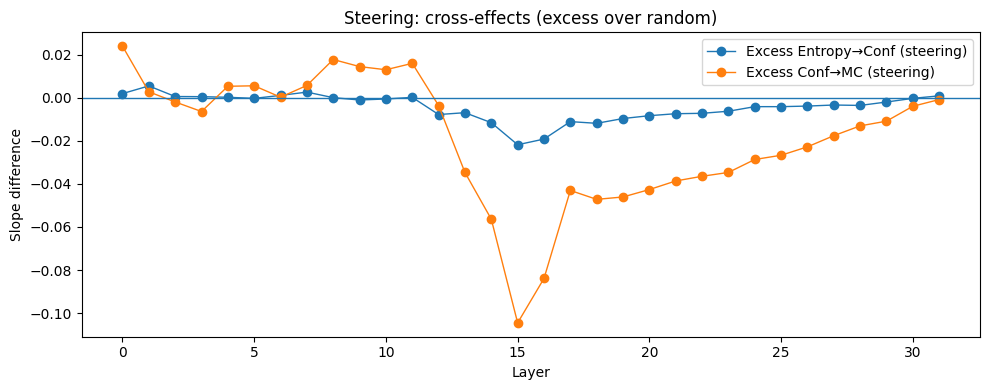

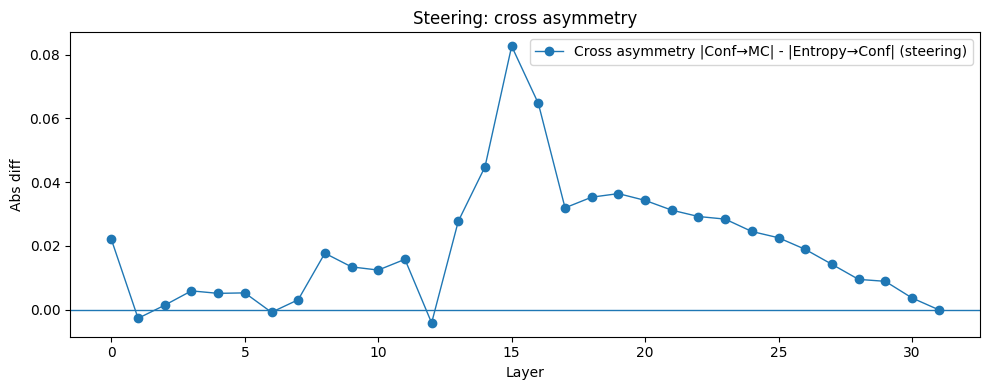

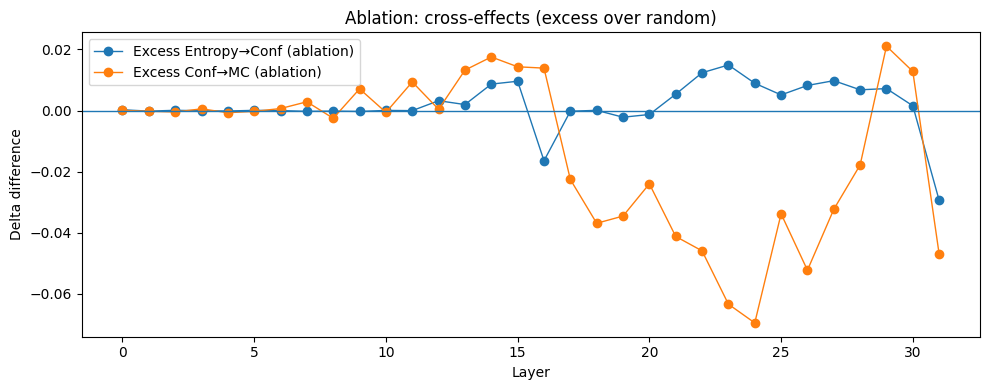

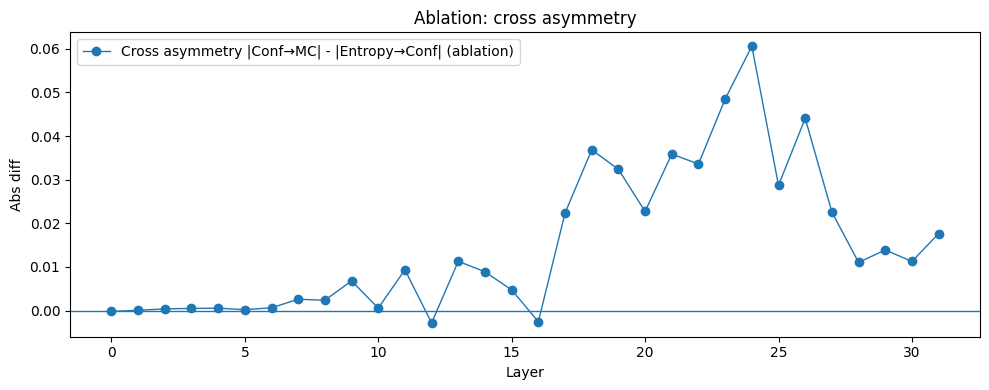

s_excess_conf_to_mc          peak@L15  value=-0.104516
s_excess_entropy_to_conf     peak@L15  value=-0.021826
s_cross_asymmetry_abs        peak@L15  value=+0.082691
a_excess_conf_to_mc          peak@L24  value=-0.069533
a_excess_entropy_to_conf     peak@L31  value=-0.029408
a_cross_asymmetry_abs        peak@L24  value=+0.060594


In [7]:
import numpy as np

# --- Steering: excess over random (raw) ---
df["s_excess_entropy_to_mc"]   = df["s_entropy_direction_mc_entropy_slope"] - df["s_random_direction_mc_entropy_slope"]
df["s_excess_entropy_to_conf"] = df["s_entropy_direction_conf_slope"]      - df["s_random_direction_conf_slope"]

df["s_excess_conf_to_conf"]    = df["s_confidence_direction_conf_slope"]   - df["s_random_direction_conf_slope"]
df["s_excess_conf_to_mc"]      = df["s_confidence_direction_mc_entropy_slope"] - df["s_random_direction_mc_entropy_slope"]

# --- Steering: asymmetry (cross vs cross) ---
# Positive means Conf→MC dominates (in magnitude) over Entropy→Conf.
df["s_cross_asymmetry_abs"] = np.abs(df["s_excess_conf_to_mc"]) - np.abs(df["s_excess_entropy_to_conf"])

# --- Ablation: excess over random (raw) ---
df["a_excess_entropy_to_mc"]   = df["a_entropy_direction_mc_entropy_delta"] - df["a_random_direction_mc_entropy_delta"]
df["a_excess_entropy_to_conf"] = df["a_entropy_direction_conf_delta"]      - df["a_random_direction_conf_delta"]

df["a_excess_conf_to_conf"]    = df["a_confidence_direction_conf_delta"]   - df["a_random_direction_conf_delta"]
df["a_excess_conf_to_mc"]      = df["a_confidence_direction_mc_entropy_delta"] - df["a_random_direction_mc_entropy_delta"]

df["a_cross_asymmetry_abs"] = np.abs(df["a_excess_conf_to_mc"]) - np.abs(df["a_excess_entropy_to_conf"])

df[["layer","s_cross_asymmetry_abs","a_cross_asymmetry_abs"]].head()


# Plot the asymmetry and the “excess” curves

import matplotlib.pyplot as plt

def plot(series, title, ylabel):
    plt.figure(figsize=(10,4))
    for y, label in series:
        plt.plot(df["layer"], y, marker="o", linewidth=1, label=label)
    plt.axhline(0, linewidth=1)
    plt.title(title)
    plt.xlabel("Layer")
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot([
    (df["s_excess_entropy_to_conf"], "Excess Entropy→Conf (steering)"),
    (df["s_excess_conf_to_mc"], "Excess Conf→MC (steering)"),
], "Steering: cross-effects (excess over random)", "Slope difference")

plot([
    (df["s_cross_asymmetry_abs"], "Cross asymmetry |Conf→MC| - |Entropy→Conf| (steering)"),
], "Steering: cross asymmetry", "Abs diff")

plot([
    (df["a_excess_entropy_to_conf"], "Excess Entropy→Conf (ablation)"),
    (df["a_excess_conf_to_mc"], "Excess Conf→MC (ablation)"),
], "Ablation: cross-effects (excess over random)", "Delta difference")

plot([
    (df["a_cross_asymmetry_abs"], "Cross asymmetry |Conf→MC| - |Entropy→Conf| (ablation)"),
], "Ablation: cross asymmetry", "Abs diff")


# Print “peak layer” summaries (where the weirdness is strongest)

def peak_abs(col):
    i = int(np.nanargmax(np.abs(df[col].values)))
    return int(df.loc[i, "layer"]), float(df.loc[i, col])

for col in [
    "s_excess_conf_to_mc",
    "s_excess_entropy_to_conf",
    "s_cross_asymmetry_abs",
    "a_excess_conf_to_mc",
    "a_excess_entropy_to_conf",
    "a_cross_asymmetry_abs",
]:
    layer, val = peak_abs(col)
    print(f"{col:28s} peak@L{layer:2d}  value={val:+.6f}")

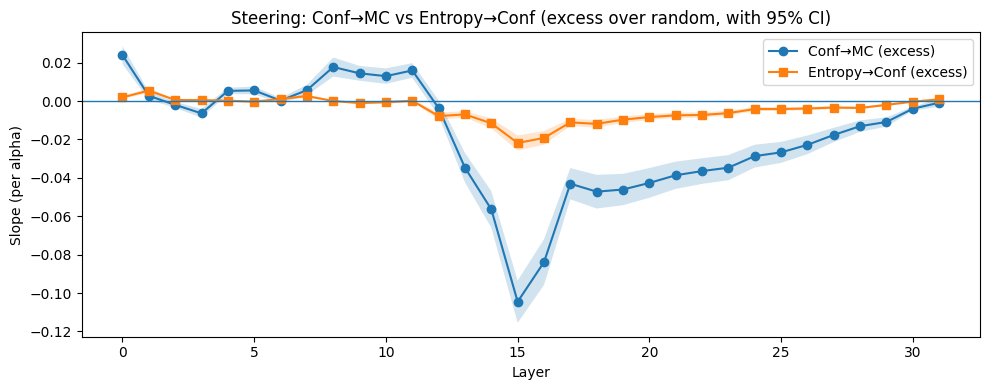

In [8]:
# A) Load steering + ablation CSVs

import pandas as pd
import numpy as np

STEER_CSV = "outputs/8b_FT_entropy/inter_contrast_causality_2/Llama-3.1-8B-Instruct_contrast_intervention_entropy_vs_confidence_steering.csv"  
ABLATE_CSV = "outputs/8b_FT_entropy/inter_contrast_causality_2/Llama-3.1-8B-Instruct_contrast_intervention_entropy_vs_confidence_ablation.csv"  

steer = pd.read_csv(STEER_CSV)
ablate = pd.read_csv(ABLATE_CSV)

# Make types sane
for raw_df in (steer, ablate):
    raw_df["layer"] = raw_df["layer"].astype(int)
    raw_df["example_id"] = raw_df["example_id"].astype(int)
    raw_df["direction"] = raw_df["direction"].astype(str)

# B) For ablation: per-layer mean effect + CI, and subtract random per example

def ablation_summary(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    # Pivot so entropy/confidence/random are columns, per (layer, example)
    piv = df.pivot_table(
        index=["layer","example_id"],
        columns="direction",
        values=["delta_mc_entropy","delta_conf_signal"],
        aggfunc="mean"
    )
    # Flatten multiindex columns
    piv.columns = [f"{a}__{b}" for a,b in piv.columns]
    piv = piv.reset_index()

    # Per-example excess over random
    for metric in ["delta_mc_entropy", "delta_conf_signal"]:
        piv[f"{metric}__entropy_excess"] = piv[f"{metric}__entropy"] - piv[f"{metric}__random"]
        piv[f"{metric}__confidence_excess"] = piv[f"{metric}__confidence"] - piv[f"{metric}__random"]

    # Layer-level summary
    def summarize(col):
        g = piv.groupby("layer")[col]
        mean = g.mean()
        sem = g.sem()
        return pd.DataFrame({"mean": mean, "sem": sem})

    out = {}
    for col in [
        "delta_mc_entropy__entropy_excess",
        "delta_mc_entropy__confidence_excess",
        "delta_conf_signal__entropy_excess",
        "delta_conf_signal__confidence_excess",
    ]:
        out[col] = summarize(col)

    summary = pd.concat(out, axis=1)
    return piv, summary

ab_piv, ab_sum = ablation_summary(ablate)
ab_sum.head()

# C) For steering: compute within-example slope vs alpha, per layer & direction
# This is important because raw deltas at alpha=-3,-2,... can be nonlinear; slope gives a clean “causal sensitivity” per example.

from sklearn.linear_model import LinearRegression

def per_example_slopes(steer_df: pd.DataFrame, metric: str) -> pd.DataFrame:
    rows = []
    for (layer, example_id, direction), g in steer_df.groupby(["layer","example_id","direction"]):
        g = g.dropna(subset=["alpha", metric])
        if g["alpha"].nunique() < 2:
            continue
        X = g["alpha"].values.reshape(-1,1)
        y = g[metric].values
        reg = LinearRegression().fit(X, y)
        rows.append({
            "layer": layer,
            "example_id": example_id,
            "direction": direction,
            f"slope_{metric}": reg.coef_[0],
            f"r2_{metric}": reg.score(X,y),
        })
    return pd.DataFrame(rows)

# Slopes for both metrics
s_mc = per_example_slopes(steer, "post_mc_entropy")
s_conf = per_example_slopes(steer, "post_conf_signal")

# Merge slopes
s = s_mc.merge(s_conf, on=["layer","example_id","direction"], how="outer")
s.head()

# D) Steering: compute “excess over random” slopes per example + layer means

def slope_excess_summary(slope_df: pd.DataFrame, slope_col: str) -> pd.DataFrame:
    piv = slope_df.pivot_table(
        index=["layer","example_id"],
        columns="direction",
        values=slope_col,
        aggfunc="mean"
    ).reset_index()

    piv["entropy_excess"] = piv["entropy"] - piv["random"]
    piv["confidence_excess"] = piv["confidence"] - piv["random"]

    summ = piv.groupby("layer")[["entropy_excess","confidence_excess"]].agg(["mean","sem"])
    return piv, summ

slope_mc_piv, slope_mc_sum = slope_excess_summary(s, "slope_post_mc_entropy")
slope_conf_piv, slope_conf_sum = slope_excess_summary(s, "slope_post_conf_signal")

slope_mc_sum.head(), slope_conf_sum.head()

# E) Quick plot: “is Conf→MC really bigger than Entropy→Conf?”


import matplotlib.pyplot as plt

def plot_two(series1, series2, title, ylabel, labels):
    layers = series1.index.values
    plt.figure(figsize=(10,4))
    plt.plot(layers, series1["mean"], marker="o", label=labels[0])
    plt.fill_between(layers,
                     series1["mean"]-1.96*series1["sem"],
                     series1["mean"]+1.96*series1["sem"], alpha=0.2)
    plt.plot(layers, series2["mean"], marker="s", label=labels[1])
    plt.fill_between(layers,
                     series2["mean"]-1.96*series2["sem"],
                     series2["mean"]+1.96*series2["sem"], alpha=0.2)
    plt.axhline(0, linewidth=1)
    plt.title(title)
    plt.xlabel("Layer")
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

# steering cross-effects on MC entropy:
#   Conf→MC is "confidence_excess" using slope_post_mc_entropy
# steering cross-effects on conf signal:
#   Entropy→Conf is "entropy_excess" using slope_post_conf_signal
conf_to_mc = slope_mc_sum["confidence_excess"]
ent_to_conf = slope_conf_sum["entropy_excess"]

plot_two(conf_to_mc, ent_to_conf,
         "Steering: Conf→MC vs Entropy→Conf (excess over random, with 95% CI)",
         "Slope (per alpha)",
         labels=["Conf→MC (excess)", "Entropy→Conf (excess)"])

# Direction Norm Diagnostics and Norm-Normalized Effects

Analyze whether the cross-effect asymmetry persists after normalizing by the L2 norms of the direction vectors.

In [9]:
# 1. Load direction vectors and compute L2 norms

import torch

# Load entropy directions from .npz
entropy_path = DIRECTION_ENTROPY_PATH
print(f"Loading entropy from: {entropy_path}")
print(f"Exists: {entropy_path.exists()}")

if not entropy_path.exists():
    raise FileNotFoundError(f"Entropy path not found: {entropy_path}")

entropy_data = np.load(entropy_path)
print(f"Keys in .npz: {entropy_data.files}")

entropy_dirs = {}
if 'directions' in entropy_data:
    arr = entropy_data['directions']
    print(f"'directions' shape: {arr.shape}")
    for layer in range(arr.shape[0]):
        entropy_dirs[layer] = arr[layer]
else:
    # Look for 'mean_diff_layer_X' keys (direction vectors)
    for key in entropy_data.files:
        if key.startswith('mean_diff_layer_'):
            try:
                layer = int(key.replace('mean_diff_layer_', ''))
                entropy_dirs[layer] = entropy_data[key]
            except ValueError:
                continue

print(f"Entropy: {len(entropy_dirs)} layers, keys: {sorted(list(entropy_dirs.keys()))[:5]}...")

# Load confidence directions from .pt
conf_path = DIRECTION_CONF_PATH
print(f"\nLoading confidence from: {conf_path}")
print(f"Exists: {conf_path.exists()}")

if not conf_path.exists():
    raise FileNotFoundError(f"Confidence path not found: {conf_path}")

conf_data = torch.load(conf_path, map_location='cpu')
print(f"Type: {type(conf_data)}")

conf_dirs = {}
if isinstance(conf_data, dict):
    print(f"Dict keys sample: {list(conf_data.keys())[:5]}")
    for k, v in conf_data.items():
        try:
            # Convert string keys to int
            layer = int(k)
            conf_dirs[layer] = v.numpy() if isinstance(v, torch.Tensor) else v
        except (ValueError, TypeError):
            continue
elif isinstance(conf_data, list):
    for layer, vec in enumerate(conf_data):
        conf_dirs[layer] = vec.numpy() if isinstance(vec, torch.Tensor) else vec
elif isinstance(conf_data, torch.Tensor):
    arr = conf_data.numpy()
    for layer in range(arr.shape[0]):
        conf_dirs[layer] = arr[layer]
else:
    raise ValueError(f"Unexpected .pt format: {type(conf_data)}")

print(f"Confidence: {len(conf_dirs)} layers, keys: {sorted(list(conf_dirs.keys()))[:5]}...")

# 2. Compute per-layer L2 norms
common = set(entropy_dirs.keys()) & set(conf_dirs.keys())
print(f"\nCommon layers: {len(common)}")

if len(common) == 0:
    print("ERROR: No overlap!")
    raise ValueError("No common layers between entropy and confidence directions")

norm_rows = []
for layer in sorted(common):
    e_vec = entropy_dirs[layer]
    c_vec = conf_dirs[layer]
    norm_rows.append({
        "layer": layer,
        "entropy_norm": np.linalg.norm(e_vec),
        "confidence_norm": np.linalg.norm(c_vec)
    })

norms_df = pd.DataFrame(norm_rows)
print(f"norms_df shape: {norms_df.shape}")
norms_df.head()

Loading entropy from: outputs/8b_FT_entropy/Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_mc_entropy_directions.npz
Exists: True
Keys in .npz: ['_metadata_dataset', '_metadata_model', '_metadata_metric', 'probe_layer_0', 'probe_scaler_scale_0', 'probe_scaler_mean_0', 'probe_layer_1', 'probe_scaler_scale_1', 'probe_scaler_mean_1', 'probe_layer_2', 'probe_scaler_scale_2', 'probe_scaler_mean_2', 'probe_layer_3', 'probe_scaler_scale_3', 'probe_scaler_mean_3', 'probe_layer_4', 'probe_scaler_scale_4', 'probe_scaler_mean_4', 'probe_layer_5', 'probe_scaler_scale_5', 'probe_scaler_mean_5', 'probe_layer_6', 'probe_scaler_scale_6', 'probe_scaler_mean_6', 'probe_layer_7', 'probe_scaler_scale_7', 'probe_scaler_mean_7', 'probe_layer_8', 'probe_scaler_scale_8', 'probe_scaler_mean_8', 'probe_layer_9', 'probe_scaler_scale_9', 'probe_scaler_mean_9', 'probe_layer_10', 'probe_scaler_scale_10', 'probe_scaler_mean_10', 'probe_layer_11', 'probe_scaler_scale_11', 'probe_scaler_mean_

/Users/daylight/miniconda3/envs/spar/lib/python3.11/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,layer,entropy_norm,confidence_norm
0,0,0.999512,0.999541
1,1,1.000000,1.000026
2,2,0.999512,1.000216
3,3,1.000000,0.999897
4,4,1.000000,1.000144


In [10]:
# Note: This cell uses the aggregated per-layer df from Cell 2
# (not the raw CSV data from Cell 8)
print("Aggregated df columns:")
print(df.columns.tolist())
print(f"\ndf shape: {df.shape} (should be 32 rows for 32 layers)")
df.head()

Aggregated df columns:
['layer', 's_baseline_mc_entropy', 's_baseline_conf_signal', 's_entropy_direction_mc_entropy_slope', 's_entropy_direction_mc_entropy_r2', 's_entropy_direction_conf_slope', 's_entropy_direction_conf_r2', 's_entropy_direction_mc_entropy_delta_pos2', 's_entropy_direction_mc_entropy_delta_neg2', 's_entropy_direction_conf_delta_pos2', 's_entropy_direction_conf_delta_neg2', 's_confidence_direction_mc_entropy_slope', 's_confidence_direction_mc_entropy_r2', 's_confidence_direction_conf_slope', 's_confidence_direction_conf_r2', 's_confidence_direction_mc_entropy_delta_pos2', 's_confidence_direction_mc_entropy_delta_neg2', 's_confidence_direction_conf_delta_pos2', 's_confidence_direction_conf_delta_neg2', 's_random_direction_mc_entropy_slope', 's_random_direction_mc_entropy_r2', 's_random_direction_conf_slope', 's_random_direction_conf_r2', 's_random_direction_mc_entropy_delta_pos2', 's_random_direction_mc_entropy_delta_neg2', 's_random_direction_conf_delta_pos2', 's_rando

,layer,s_baseline_mc_entropy,s_baseline_conf_signal,s_entropy_direction_mc_entropy_slope,s_entropy_direction_mc_entropy_r2,s_entropy_direction_conf_slope,s_entropy_direction_conf_r2,s_entropy_direction_mc_entropy_delta_pos2,s_entropy_direction_mc_entropy_delta_neg2,s_entropy_direction_conf_delta_pos2,...,s_excess_entropy_to_mc,s_excess_entropy_to_conf,s_excess_conf_to_conf,s_excess_conf_to_mc,s_cross_asymmetry_abs,a_excess_entropy_to_mc,a_excess_entropy_to_conf,a_excess_conf_to_conf,a_excess_conf_to_mc,a_cross_asymmetry_abs
0,0,0.354588,0.893709,0.001009,0.011182,0.003668,0.423041,0.005688,-0.012103,0.005562,...,0.011987,0.001920,-0.006210,0.023938,0.022018,0.000252,0.000250,-0.000076,0.000055,-0.000195
1,1,0.354588,0.893709,-0.009642,0.764915,0.005554,0.854730,-0.021053,-0.005351,0.008943,...,-0.007090,0.005480,-0.000316,0.002756,-0.002724,0.001009,-0.000190,-0.000007,-0.000245,0.000055
2,2,0.354588,0.893709,-0.004270,0.593057,0.001349,0.772360,-0.002298,0.008725,0.005700,...,-0.006688,0.000563,-0.000556,-0.001961,0.001399,-0.000187,0.000077,0.000113,-0.000470,0.000394
3,3,0.354588,0.893709,-0.000367,0.040279,0.000836,0.700763,-0.007785,-0.001603,0.001847,...,-0.002050,0.000502,-0.001438,-0.006395,0.005892,0.000229,-0.000067,0.000334,0.000552,0.000486
4,4,0.354588,0.893709,-0.006444,0.912531,0.000618,0.584430,-0.021365,0.007634,0.002394,...,-0.005351,0.000211,-0.001977,0.005316,0.005105,0.000911,-0.000157,0.000267,-0.000702,0.000545


In [11]:
# 3. Merge norms into main dataframe
df = df.merge(norms_df, on="layer", how="left")

# 4. Create norm-normalized metrics
# Steering
df["s_excess_entropy_to_conf_norm"] = df["s_excess_entropy_to_conf"] / df["entropy_norm"]
df["s_excess_conf_to_mc_norm"] = df["s_excess_conf_to_mc"] / df["confidence_norm"]

# Ablation
df["a_excess_entropy_to_conf_norm"] = df["a_excess_entropy_to_conf"] / df["entropy_norm"]
df["a_excess_conf_to_mc_norm"] = df["a_excess_conf_to_mc"] / df["confidence_norm"]

# Norm-normalized asymmetry
df["s_cross_asymmetry_norm"] = np.abs(df["s_excess_conf_to_mc_norm"]) - np.abs(df["s_excess_entropy_to_conf_norm"])
df["a_cross_asymmetry_norm"] = np.abs(df["a_excess_conf_to_mc_norm"]) - np.abs(df["a_excess_entropy_to_conf_norm"])

df[["layer", "entropy_norm", "confidence_norm", 
    "s_excess_entropy_to_conf_norm", "s_excess_conf_to_mc_norm", 
    "s_cross_asymmetry_norm"]].head(10)

/Users/daylight/miniconda3/envs/spar/lib/python3.11/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,layer,entropy_norm,confidence_norm,s_excess_entropy_to_conf_norm,s_excess_conf_to_mc_norm,s_cross_asymmetry_norm
0,0,0.999512,0.999541,0.001921,0.023949,0.022028
1,1,1.000000,1.000026,0.005480,0.002756,-0.002724
2,2,0.999512,1.000216,0.000563,-0.001961,0.001398
3,3,1.000000,0.999897,0.000502,-0.006395,0.005893
4,4,1.000000,1.000144,0.000211,0.005315,0.005104
5,5,0.999512,0.999636,-0.000291,0.005552,0.005261
6,6,1.000000,1.000116,0.001090,0.000258,-0.000832
7,7,1.000000,1.000101,0.002614,0.005714,0.003100
8,8,1.000000,1.000264,0.000039,0.017739,0.017700
9,9,1.000000,1.000122,-0.001046,0.014460,0.013414


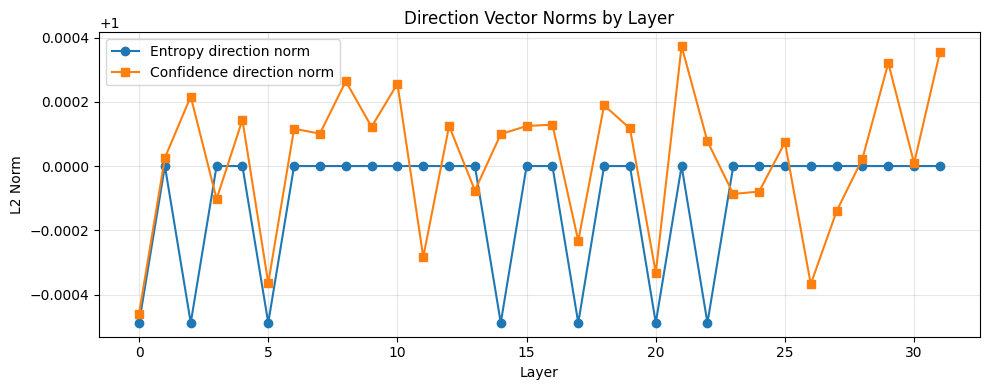

In [12]:
# 5. Plot direction norms by layer
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df["layer"], df["entropy_norm"], marker="o", label="Entropy direction norm")
plt.plot(df["layer"], df["confidence_norm"], marker="s", label="Confidence direction norm")
plt.xlabel("Layer")
plt.ylabel("L2 Norm")
plt.title("Direction Vector Norms by Layer")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

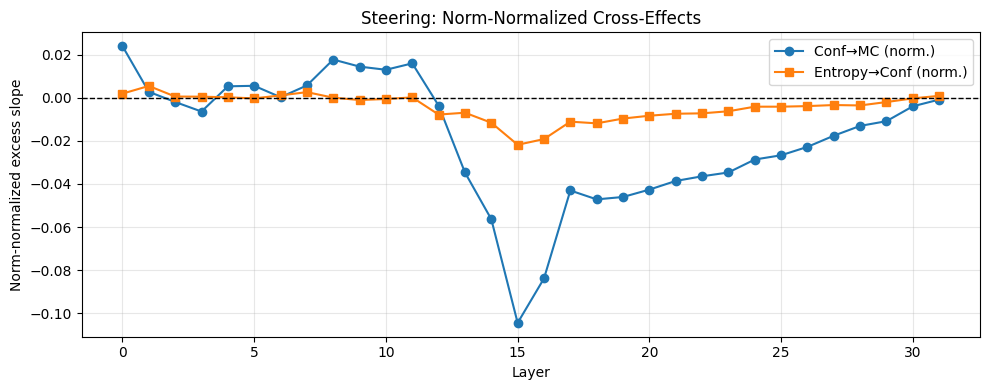

In [13]:
# Plot norm-normalized steering cross-effects
plt.figure(figsize=(10, 4))
plt.plot(df["layer"], df["s_excess_conf_to_mc_norm"], marker="o", label="Conf→MC (norm.)")
plt.plot(df["layer"], df["s_excess_entropy_to_conf_norm"], marker="s", label="Entropy→Conf (norm.)")
plt.axhline(0, color="k", linewidth=1, linestyle="--")
plt.xlabel("Layer")
plt.ylabel("Norm-normalized excess slope")
plt.title("Steering: Norm-Normalized Cross-Effects")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

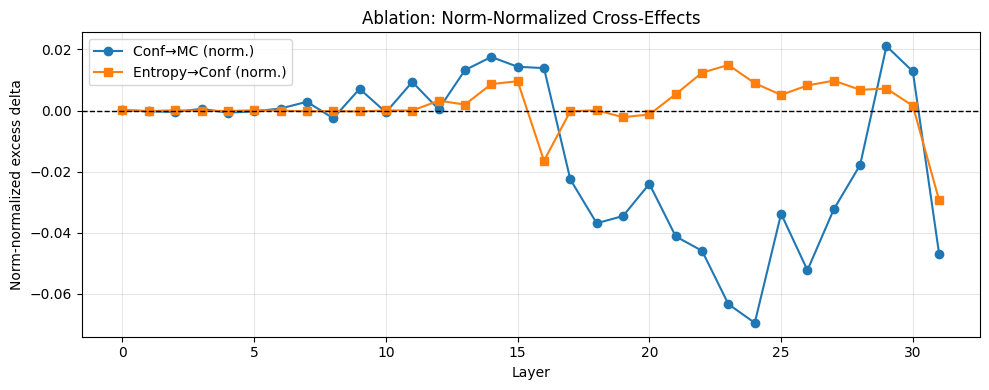

In [14]:
# Plot norm-normalized ablation cross-effects
plt.figure(figsize=(10, 4))
plt.plot(df["layer"], df["a_excess_conf_to_mc_norm"], marker="o", label="Conf→MC (norm.)")
plt.plot(df["layer"], df["a_excess_entropy_to_conf_norm"], marker="s", label="Entropy→Conf (norm.)")
plt.axhline(0, color="k", linewidth=1, linestyle="--")
plt.xlabel("Layer")
plt.ylabel("Norm-normalized excess delta")
plt.title("Ablation: Norm-Normalized Cross-Effects")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

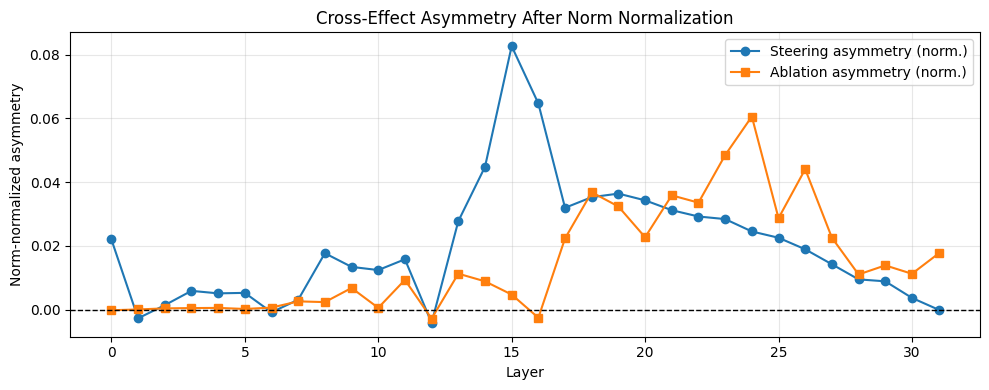

In [15]:
# Plot norm-normalized asymmetry
plt.figure(figsize=(10, 4))
plt.plot(df["layer"], df["s_cross_asymmetry_norm"], marker="o", label="Steering asymmetry (norm.)")
plt.plot(df["layer"], df["a_cross_asymmetry_norm"], marker="s", label="Ablation asymmetry (norm.)")
plt.axhline(0, color="k", linewidth=1, linestyle="--")
plt.xlabel("Layer")
plt.ylabel("Norm-normalized asymmetry")
plt.title("Cross-Effect Asymmetry After Norm Normalization")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Interpretation: Direction Norms

The plots above show:
- **Relative magnitude**: Whether confidence directions have systematically larger L2 norms than entropy directions
- If confidence norms are much larger, the raw asymmetry might simply reflect that confidence directions are "bigger" vectors

## Interpretation: Asymmetry After Normalization

After dividing by direction norms:
- **If asymmetry persists**: The confidence→MC effect is genuinely stronger per unit of direction magnitude, not just because confidence vectors are larger
- **If asymmetry disappears**: The raw asymmetry was primarily due to confidence directions having larger norms
- **Peak layers (~15–24)**: Check whether these layers still dominate after normalization, or if the effect is more uniformly distributed

## Summary Statistics

Key findings:

In [16]:
# Summary statistics
print("=" * 60)
print("DIRECTION NORMS")
print("=" * 60)
print(f"Mean entropy norm:      {df['entropy_norm'].mean():.4f}")
print(f"Mean confidence norm:   {df['confidence_norm'].mean():.4f}")
print(f"Ratio (conf/entropy):   {(df['confidence_norm'].mean() / df['entropy_norm'].mean()):.2f}x")
print()

print("=" * 60)
print("NORM-NORMALIZED ASYMMETRY")
print("=" * 60)
# Find peak layers
s_norm_peak_layer = df["s_cross_asymmetry_norm"].abs().idxmax()
a_norm_peak_layer = df["a_cross_asymmetry_norm"].abs().idxmax()

print(f"Steering peak (norm.):  Layer {s_norm_peak_layer}, value={df.loc[s_norm_peak_layer, 's_cross_asymmetry_norm']:.6f}")
print(f"Ablation peak (norm.):  Layer {a_norm_peak_layer}, value={df.loc[a_norm_peak_layer, 'a_cross_asymmetry_norm']:.6f}")
print()

# Compare to un-normalized peaks
s_raw_peak_layer = df["s_cross_asymmetry_abs"].abs().idxmax()
a_raw_peak_layer = df["a_cross_asymmetry_abs"].abs().idxmax()
print(f"Steering peak (raw):    Layer {s_raw_peak_layer}, value={df.loc[s_raw_peak_layer, 's_cross_asymmetry_abs']:.6f}")
print(f"Ablation peak (raw):    Layer {a_raw_peak_layer}, value={df.loc[a_raw_peak_layer, 'a_cross_asymmetry_abs']:.6f}")
print("=" * 60)

DIRECTION NORMS
Mean entropy norm:      1.0000
Mean confidence norm:   1.0000
Ratio (conf/entropy):   1.00x

NORM-NORMALIZED ASYMMETRY
Steering peak (norm.):  Layer 15, value=0.082678
Ablation peak (norm.):  Layer 24, value=0.060599

Steering peak (raw):    Layer 15, value=0.082691
Ablation peak (raw):    Layer 24, value=0.060594


# NPZ Activation Projections + Correlation Matrices

Analyze already-saved activations from .npz files to understand representation geometry without running model inference.

In [17]:
# Configuration for NPZ-based analysis


# Paths to direction NPZ files
ENTROPY_DIRS_NPZ = DIRECTION_ENTROPY_PATH  # Already defined above
CONF_DIRS_NPZ = DIRECTION_CONF_PATH  # .pt file

# For confidence activations with multiple positions, which position to use
POSITION_KEY = "final"  # Options: "final", "question_mark", "question_newline", "options_newline"

# Layers to focus on for correlation analysis (will clip to available range)
FOCUS_LAYERS = [12, 14, 15, 16, 18, 20, 24, 28, 31]

print("Configuration:")
print(f"  MC activations:     {MC_ACTS_NPZ}")
print(f"  Conf activations:   {CONF_ACTS_NPZ}")
print(f"  Entropy directions: {ENTROPY_DIRS_NPZ}")
print(f"  Conf directions:    {CONF_DIRS_NPZ}")
print(f"  Position key:       {POSITION_KEY}")
print(f"  Focus layers:       {FOCUS_LAYERS}")

Configuration:
  MC activations:     outputs/8b_FT_entropy/Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_mc_activations.npz
  Conf activations:   outputs/8b_FT_entropy/Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_transfer_confidence_activations.npz
  Entropy directions: outputs/8b_FT_entropy/Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_mc_entropy_directions.npz
  Conf directions:    outputs/8b_FT_entropy/confidence_contrast/Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_confidence_contrast_directions.pt
  Position key:       final
  Focus layers:       [12, 14, 15, 16, 18, 20, 24, 28, 31]


In [18]:
# Utility functions for loading NPZ files

def inspect_npz(path, max_keys=15):
    """Print keys and shapes from an NPZ file."""
    print(f"\n{'='*60}")
    print(f"Inspecting: {path.name}")
    print(f"{'='*60}")
    
    data = np.load(path)
    keys = sorted(data.files)
    
    print(f"Total keys: {len(keys)}")
    print(f"\nFirst {min(max_keys, len(keys))} keys:")
    print(f"{'Key':<40} {'Shape':<20} {'Dtype':<10}")
    print("-" * 70)
    
    for key in keys[:max_keys]:
        arr = data[key]
        print(f"{key:<40} {str(arr.shape):<20} {str(arr.dtype):<10}")
    
    if len(keys) > max_keys:
        print(f"... and {len(keys) - max_keys} more keys")
    
    data.close()
    return keys

def load_acts_npz(path, position=None):
    """
    Load activation arrays from NPZ.
    
    Returns:
        dict mapping layer_idx -> array of shape (num_examples, hidden_dim)
    """
    data = np.load(path)
    activations = {}
    
    # Try to detect format
    keys = data.files
    
    # Format 1: layer_{i} (MC activations)
    layer_keys = [k for k in keys if k.startswith("layer_") and not k.startswith("layer_") or k.count("_") == 1]
    
    if layer_keys:
        # Try simple layer_{i} format first
        for key in layer_keys:
            try:
                layer_idx = int(key.split("_")[1])
                activations[layer_idx] = data[key]
            except (ValueError, IndexError):
                continue
    
    # Format 2: layer_{i}_{position} (confidence activations)
    if position is not None:
        pos_keys = [k for k in keys if k.startswith("layer_") and k.endswith(f"_{position}")]
        for key in pos_keys:
            try:
                parts = key.split("_")
                layer_idx = int(parts[1])
                activations[layer_idx] = data[key]
            except (ValueError, IndexError):
                continue
    
    if not activations:
        # Try to find any layer keys and report
        layer_like = [k for k in keys if "layer" in k.lower()]
        raise ValueError(
            f"Could not find activation keys in {path.name}.\n"
            f"Available keys ({len(keys)} total): {keys[:10]}\n"
            f"Layer-like keys: {layer_like[:10]}"
        )
    
    print(f"\nLoaded {len(activations)} layers from {path.name}")
    first_layer = min(activations.keys())
    print(f"  Shape per layer: {activations[first_layer].shape}")
    print(f"  Dtype: {activations[first_layer].dtype}")
    
    return activations

def load_dirs_npz(path, method="probe"):
    """
    Load direction vectors from NPZ or PT file.
    
    Args:
        path: Path to .npz or .pt file
        method: For .npz files, which method to load ("probe" or "mean_diff")
    
    Returns:
        dict mapping layer_idx -> direction vector of shape (hidden_dim,)
    """
    import torch
    
    directions = {}
    
    if path.suffix == ".pt":
        # PyTorch file - load directly
        data = torch.load(path, map_location="cpu")
        
        # Handle different PT file structures
        if isinstance(data, dict):
            # Dictionary format: {layer_idx: tensor} or {str(layer_idx): tensor}
            for key, val in data.items():
                try:
                    if isinstance(key, int):
                        layer_idx = key
                    else:
                        layer_idx = int(key)
                    directions[layer_idx] = val.numpy() if isinstance(val, torch.Tensor) else np.array(val)
                except (ValueError, TypeError):
                    continue
        elif isinstance(data, torch.Tensor):
            # Single tensor format - assume shape is (num_layers, hidden_dim)
            print(f"  PT file contains single tensor of shape {data.shape}")
            if len(data.shape) == 2:
                for layer_idx in range(data.shape[0]):
                    directions[layer_idx] = data[layer_idx].numpy()
            else:
                raise ValueError(
                    f"PT file contains tensor of unexpected shape {data.shape}.\n"
                    f"Expected (num_layers, hidden_dim) or dict format."
                )
        elif isinstance(data, list):
            # List format: [tensor_layer_0, tensor_layer_1, ...]
            for layer_idx, val in enumerate(data):
                directions[layer_idx] = val.numpy() if isinstance(val, torch.Tensor) else np.array(val)
        else:
            raise ValueError(
                f"PT file has unexpected type {type(data)}.\n"
                f"Expected dict, Tensor, or list."
            )
        
        print(f"\nLoaded {len(directions)} directions from {path.name} (PT format)")
    else:
        # NPZ file
        data = np.load(path)
        keys = data.files
        
        # Try different formats
        # Format 1: {method}_layer_{i} (identify_mc_correlate.py)
        method_keys = [k for k in keys if k.startswith(f"{method}_layer_")]
        if method_keys:
            for key in method_keys:
                try:
                    layer_idx = int(key.split("_")[-1])
                    directions[layer_idx] = data[key]
                except (ValueError, IndexError):
                    continue
        else:
            # Format 2: layer_{i} (mc_entropy_probe.py - older format)
            layer_keys = [k for k in keys if k.startswith("layer_") and not k.startswith("_")]
            for key in layer_keys:
                try:
                    layer_idx = int(key.split("_")[1])
                    directions[layer_idx] = data[key]
                except (ValueError, IndexError):
                    continue
        
        if not directions:
            # Show available methods for debugging
            methods_found = set()
            for k in keys:
                if "_layer_" in k and not k.startswith("_"):
                    methods_found.add(k.split("_layer_")[0])
            
            raise ValueError(
                f"Could not find direction keys with method='{method}' in {path.name}.\n"
                f"Available methods: {methods_found}\n"
                f"First 10 keys: {keys[:10]}"
            )
        
        print(f"\nLoaded {len(directions)} directions from {path.name} (method={method})")
    
    # Normalize all directions
    for layer_idx in directions:
        vec = directions[layer_idx]
        norm = np.linalg.norm(vec)
        if norm > 0:
            directions[layer_idx] = vec / norm
    
    first_layer = min(directions.keys())
    print(f"  Shape per layer: {directions[first_layer].shape}")
    print(f"  Dtype: {directions[first_layer].dtype}")
    
    return directions

def load_other_npz_data(path):
    """Load non-activation data from NPZ (e.g., metrics, confidences)."""
    data = np.load(path)
    result = {}
    
    # Look for metric arrays and other metadata
    for key in data.files:
        if not key.startswith("layer") and not key.startswith("_") and not key.startswith("valid"):
            result[key] = data[key]
    
    return result

# Test inspection
_ = inspect_npz(MC_ACTS_NPZ, max_keys=15)
_ = inspect_npz(CONF_ACTS_NPZ, max_keys=15)
_ = inspect_npz(ENTROPY_DIRS_NPZ, max_keys=15)


Inspecting: Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_mc_activations.npz
Total keys: 37

First 15 keys:
Key                                      Shape                Dtype     
----------------------------------------------------------------------
entropy                                  (500,)               float64   
layer_0                                  (500, 4096)          float16   
layer_1                                  (500, 4096)          float16   
layer_10                                 (500, 4096)          float16   
layer_11                                 (500, 4096)          float16   
layer_12                                 (500, 4096)          float16   
layer_13                                 (500, 4096)          float16   
layer_14                                 (500, 4096)          float16   
layer_15                                 (500, 4096)          float16   
layer_16                                 (500, 4096)          f

In [19]:
# Load all activations and directions

print("\n" + "="*70)
print("LOADING DATA")
print("="*70)

# Load MC activations
mc_acts = load_acts_npz(MC_ACTS_NPZ)
mc_other = load_other_npz_data(MC_ACTS_NPZ)
print(f"\nMC other data keys: {list(mc_other.keys())}")

# Load confidence activations
conf_acts = load_acts_npz(CONF_ACTS_NPZ, position=POSITION_KEY)
conf_other = load_other_npz_data(CONF_ACTS_NPZ)
print(f"\nConf other data keys: {list(conf_other.keys())}")

# Load directions (try both methods for entropy)
try:
    entropy_dirs = load_dirs_npz(ENTROPY_DIRS_NPZ, method="mean_diff")
    entropy_method = "mean_diff"
except ValueError:
    try:
        entropy_dirs = load_dirs_npz(ENTROPY_DIRS_NPZ, method="probe")
        entropy_method = "probe"
    except ValueError:
        # Old format without method prefix
        entropy_dirs = load_dirs_npz(ENTROPY_DIRS_NPZ, method="layer")
        entropy_method = "layer"
        
print(f"  Using entropy method: {entropy_method}")

# Load confidence directions
conf_dirs = load_dirs_npz(CONF_DIRS_NPZ)

# Align layers (use intersection)
mc_layers = set(mc_acts.keys())
conf_layers = set(conf_acts.keys())
entropy_dir_layers = set(entropy_dirs.keys())
conf_dir_layers = set(conf_dirs.keys())

common_layers = sorted(mc_layers & conf_layers & entropy_dir_layers & conf_dir_layers)
print(f"\n{'='*70}")
print(f"LAYER ALIGNMENT")
print(f"{'='*70}")
print(f"MC activation layers:       {len(mc_layers)}")
print(f"Conf activation layers:     {len(conf_layers)}")
print(f"Entropy direction layers:   {len(entropy_dir_layers)}")
print(f"Conf direction layers:      {len(conf_dir_layers)}")
print(f"Common layers:              {len(common_layers)} (range: {min(common_layers)}-{max(common_layers)})")

# Get number of examples (should match)
n_mc = mc_acts[common_layers[0]].shape[0]
n_conf = conf_acts[common_layers[0]].shape[0]
print(f"\nNumber of examples:")
print(f"  MC:   {n_mc}")
print(f"  Conf: {n_conf}")

if n_mc != n_conf:
    print(f"  WARNING: Example counts don't match! Will use min = {min(n_mc, n_conf)}")
    n_examples = min(n_mc, n_conf)
else:
    n_examples = n_mc


LOADING DATA

Loaded 32 layers from Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_mc_activations.npz
  Shape per layer: (500, 4096)
  Dtype: float16

MC other data keys: ['entropy', 'top_prob', 'margin', 'logit_gap', 'top_logit']

Loaded 32 layers from Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_transfer_confidence_activations.npz
  Shape per layer: (500, 4096)
  Dtype: float16

Conf other data keys: ['confidences']

Loaded 32 directions from Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_mc_entropy_directions.npz (method=mean_diff)
  Shape per layer: (4096,)
  Dtype: float16
  Using entropy method: mean_diff
  PT file contains single tensor of shape torch.Size([32, 4096])

Loaded 32 directions from Llama-3.1-8B-Instruct_adapter-ect_20251222_215412_v0uei7y1_2000_TriviaMC_confidence_contrast_directions.pt (PT format)
  Shape per layer: (4096,)
  Dtype: float32

LAYER ALIGNMENT
MC activation layers:       

In [20]:
# Compute per-example projections for all layers

print("\n" + "="*70)
print("COMPUTING PROJECTIONS")
print("="*70)

# Storage for projections
# Structure: {prompt_type: {layer: {metric: array of shape (n_examples,)}}}
projections = {
    "mc": {},
    "conf": {}
}

for layer in common_layers:
    # MC projections
    mc_act = mc_acts[layer][:n_examples]  # (n_examples, hidden_dim)
    
    # Project onto entropy direction
    e_proj_mc = mc_act @ entropy_dirs[layer]  # (n_examples,)
    
    # Project onto confidence direction
    c_proj_mc = mc_act @ conf_dirs[layer]  # (n_examples,)
    
    # Compute representation norm
    rnorm_mc = np.linalg.norm(mc_act, axis=1)  # (n_examples,)
    
    projections["mc"][layer] = {
        "e_proj": e_proj_mc,
        "c_proj": c_proj_mc,
        "rnorm": rnorm_mc
    }
    
    # Confidence projections
    conf_act = conf_acts[layer][:n_examples]  # (n_examples, hidden_dim)
    
    e_proj_conf = conf_act @ entropy_dirs[layer]
    c_proj_conf = conf_act @ conf_dirs[layer]
    rnorm_conf = np.linalg.norm(conf_act, axis=1)
    
    projections["conf"][layer] = {
        "e_proj": e_proj_conf,
        "c_proj": c_proj_conf,
        "rnorm": rnorm_conf
    }

print(f"Computed projections for {len(common_layers)} layers, {n_examples} examples")
print(f"Metrics per layer: e_proj, c_proj, rnorm")

# Quick sanity check - print stats for a middle layer
mid_layer = common_layers[len(common_layers)//2]
print(f"\nSanity check (layer {mid_layer}):")
for ptype in ["mc", "conf"]:
    print(f"  {ptype}:")
    for metric in ["e_proj", "c_proj", "rnorm"]:
        vals = projections[ptype][mid_layer][metric]
        print(f"    {metric:8s}: mean={vals.mean():+.3f}, std={vals.std():.3f}, range=[{vals.min():+.3f}, {vals.max():+.3f}]")


COMPUTING PROJECTIONS
Computed projections for 32 layers, 500 examples
Metrics per layer: e_proj, c_proj, rnorm

Sanity check (layer 16):
  mc:
    e_proj  : mean=-1.286, std=1.343, range=[-3.670, +1.506]
    c_proj  : mean=+0.510, std=0.781, range=[-1.535, +1.716]
    rnorm   : mean=+9.672, std=0.172, range=[+9.031, +10.062]
  conf:
    e_proj  : mean=-1.354, std=0.820, range=[-2.783, +0.649]
    c_proj  : mean=+1.269, std=1.355, range=[-2.366, +3.483]
    rnorm   : mean=+10.000, std=0.174, range=[+9.516, +10.445]


In [21]:
# Build long-form dataframe

print("\n" + "="*70)
print("BUILDING LONG-FORM DATAFRAME")
print("="*70)

rows = []
for ptype in ["mc", "conf"]:
    for layer in common_layers:
        for example_id in range(n_examples):
            row = {
                "prompt_type": ptype,
                "layer": layer,
                "example_id": example_id,
                "c_proj": projections[ptype][layer]["c_proj"][example_id],
                "e_proj": projections[ptype][layer]["e_proj"][example_id],
                "rnorm": projections[ptype][layer]["rnorm"][example_id],
            }
            rows.append(row)

df_long = pd.DataFrame(rows)
print(f"Long dataframe shape: {df_long.shape}")
print(f"\nFirst few rows:")
print(df_long.head(10))

print(f"\nData types:")
print(df_long.dtypes)

print(f"\nSummary statistics:")
print(df_long.groupby("prompt_type")[["c_proj", "e_proj", "rnorm"]].describe())


BUILDING LONG-FORM DATAFRAME
Long dataframe shape: (32000, 6)

First few rows:
  prompt_type  layer  example_id    c_proj    e_proj     rnorm
0          mc      0           0  0.026038 -0.071716  0.818848
1          mc      0           1  0.030415 -0.046326  0.822266
2          mc      0           2  0.028841 -0.055389  0.820801
3          mc      0           3  0.020232 -0.046143  0.815918
4          mc      0           4 -0.008189 -0.025558  0.820312
5          mc      0           5  0.005067 -0.021210  0.813965
6          mc      0           6  0.016784 -0.042389  0.820312
7          mc      0           7  0.013951 -0.040558  0.818359
8          mc      0           8  0.010725 -0.035858  0.818359
9          mc      0           9  0.004133 -0.026321  0.819824

Data types:
prompt_type     object
layer            int64
example_id       int64
c_proj         float32
e_proj         float16
rnorm          float16
dtype: object

Summary statistics:
              c_proj                     

/Users/daylight/miniconda3/envs/spar/lib/python3.11/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/Users/daylight/miniconda3/envs/spar/lib/python3.11/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/daylight/miniconda3/envs/spar/lib/python3.11/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [22]:
# Build wide-form dataframe for correlation analysis

print("\n" + "="*70)
print("BUILDING WIDE-FORM DATAFRAME")
print("="*70)

# Clip focus layers to available range
focus_layers_valid = [l for l in FOCUS_LAYERS if l in common_layers]
if not focus_layers_valid:
    # Fall back to equally-spaced layers
    focus_layers_valid = common_layers[::len(common_layers)//10] if len(common_layers) > 10 else common_layers
    print(f"WARNING: None of {FOCUS_LAYERS} in common layers. Using: {focus_layers_valid}")
else:
    print(f"Using {len(focus_layers_valid)} focus layers: {focus_layers_valid}")

# Build wide dataframe with one row per example
wide_data = {"example_id": np.arange(n_examples)}

for ptype in ["mc", "conf"]:
    for layer in focus_layers_valid:
        prefix = f"{ptype}_L{layer}"
        wide_data[f"{prefix}_c"] = projections[ptype][layer]["c_proj"]
        wide_data[f"{prefix}_e"] = projections[ptype][layer]["e_proj"]
        wide_data[f"{prefix}_rnorm"] = projections[ptype][layer]["rnorm"]

df_wide = pd.DataFrame(wide_data)
print(f"\nWide dataframe shape: {df_wide.shape}")
print(f"Columns: {list(df_wide.columns[:10])} ... ({len(df_wide.columns)} total)")

# Add baseline metrics if available
if "entropy" in mc_other:
    df_wide["mc_entropy"] = mc_other["entropy"][:n_examples]
    print(f"Added mc_entropy from NPZ")

if "confidences" in conf_other:
    df_wide["conf_signal"] = conf_other["confidences"][:n_examples]
    print(f"Added conf_signal from NPZ")

# Try to add correctness if available in MC metadata
if "is_correct" in mc_other:
    df_wide["mc_correct"] = mc_other["is_correct"][:n_examples].astype(int)
    print(f"Added mc_correct from NPZ")

print(f"\nFinal wide dataframe shape: {df_wide.shape}")
print(df_wide.head())


BUILDING WIDE-FORM DATAFRAME
Using 9 focus layers: [12, 14, 15, 16, 18, 20, 24, 28, 31]

Wide dataframe shape: (500, 55)
Columns: ['example_id', 'mc_L12_c', 'mc_L12_e', 'mc_L12_rnorm', 'mc_L14_c', 'mc_L14_e', 'mc_L14_rnorm', 'mc_L15_c', 'mc_L15_e', 'mc_L15_rnorm'] ... (55 total)
Added mc_entropy from NPZ
Added conf_signal from NPZ

Final wide dataframe shape: (500, 57)
   example_id  mc_L12_c  mc_L12_e  mc_L12_rnorm  mc_L14_c  mc_L14_e  \
0           0 -0.464465 -0.299805      6.703125  1.290247 -1.961914   
1           1 -0.655576  0.088013      6.679688  1.053197 -0.990234   
2           2 -0.611948  0.069641      6.589844  0.273330 -0.691406   
3           3 -0.522657  0.054779      6.644531  1.203175 -1.026367   
4           4 -0.872140  0.500000      6.687500  0.215622 -0.059937   

   mc_L14_rnorm  mc_L15_c  mc_L15_e  mc_L15_rnorm  ...  conf_L24_e  \
0      8.289062  1.047499 -2.052734      8.625000  ...   -1.127930   
1      8.242188  0.871808 -1.142578      8.656250  ...    0.

/Users/daylight/miniconda3/envs/spar/lib/python3.11/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [23]:
# Compute correlation matrices

print("\n" + "="*70)
print("CORRELATION MATRICES")
print("="*70)

# Separate MC and Conf columns (exclude example_id and baseline metrics)
mc_cols = [c for c in df_wide.columns if c.startswith("mc_L")]
conf_cols = [c for c in df_wide.columns if c.startswith("conf_L")]
baseline_cols = [c for c in df_wide.columns if c in ["mc_entropy", "conf_signal", "mc_correct"]]

print(f"\nMC columns: {len(mc_cols)}")
print(f"Conf columns: {len(conf_cols)}")
print(f"Baseline columns: {baseline_cols}")

# MC-only correlation
if mc_cols:
    corr_mc = df_wide[mc_cols].corr()
    print(f"\nMC correlation matrix shape: {corr_mc.shape}")

# Conf-only correlation
if conf_cols:
    corr_conf = df_wide[conf_cols].corr()
    print(f"Conf correlation matrix shape: {corr_conf.shape}")

# Combined correlation (MC + Conf + baselines)
all_cols = mc_cols + conf_cols + baseline_cols
all_cols = [c for c in all_cols if c in df_wide.columns]  # Filter to existing
corr_all = df_wide[all_cols].corr()
print(f"Combined correlation matrix shape: {corr_all.shape}")

# Display sample - correlation between mc_c_proj and mc_e_proj at layer 15
if 15 in focus_layers_valid:
    mc_c15 = "mc_L15_c"
    mc_e15 = "mc_L15_e"
    if mc_c15 in df_wide.columns and mc_e15 in df_wide.columns:
        corr_val = df_wide[[mc_c15, mc_e15]].corr().iloc[0, 1]
        print(f"\nExample: corr({mc_c15}, {mc_e15}) = {corr_val:.4f}")


CORRELATION MATRICES

MC columns: 27
Conf columns: 27
Baseline columns: ['mc_entropy', 'conf_signal']

MC correlation matrix shape: (27, 27)
Conf correlation matrix shape: (27, 27)
Combined correlation matrix shape: (56, 56)

Example: corr(mc_L15_c, mc_L15_e) = -0.9359


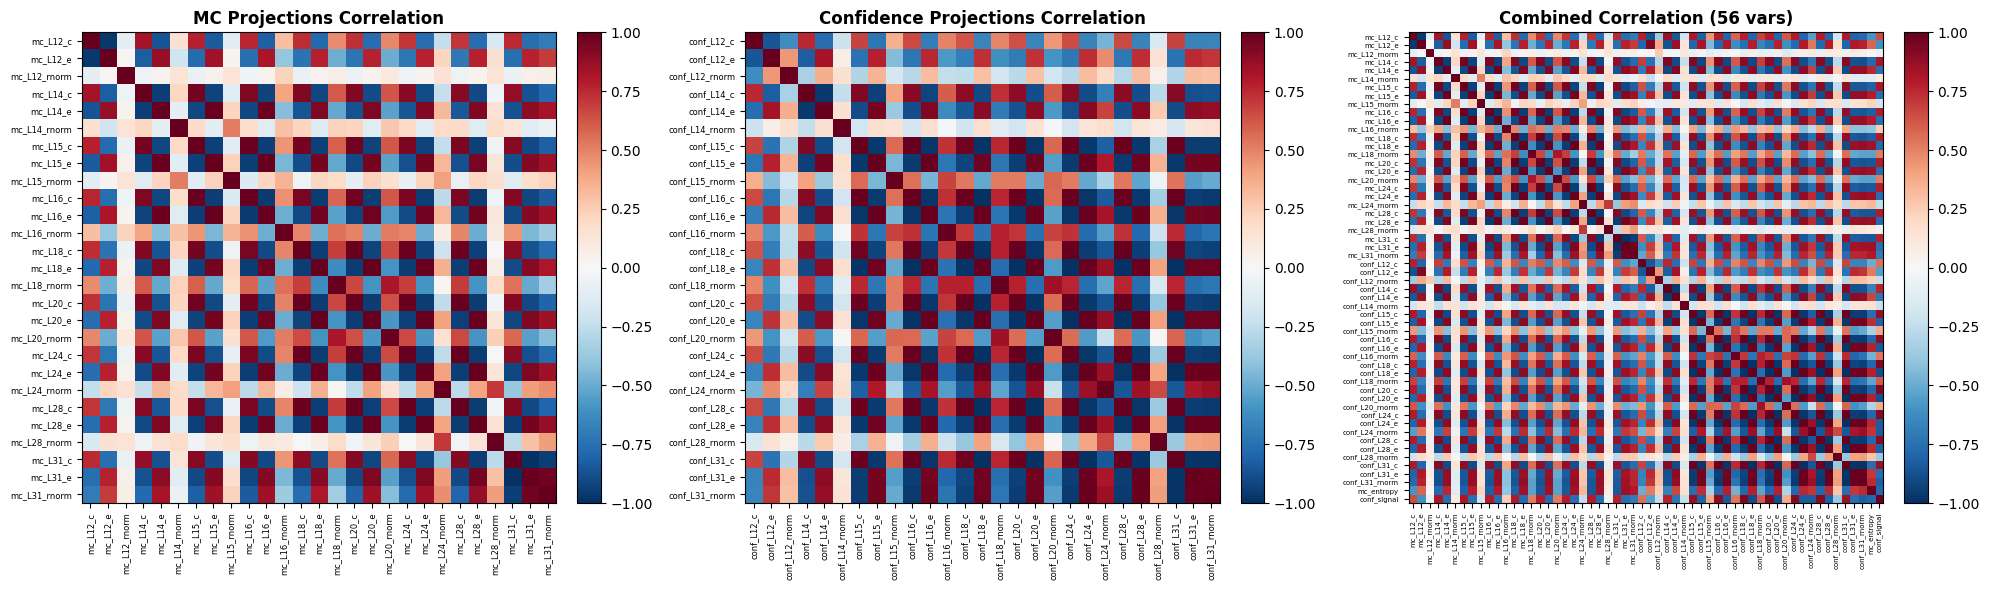


Saved correlation heatmaps to outputs/npz_projection_correlations.png


In [24]:
# Visualize correlation matrices

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# MC-only
if mc_cols:
    ax = axes[0]
    im = ax.imshow(corr_mc, cmap="RdBu_r", vmin=-1, vmax=1, aspect="auto")
    ax.set_title("MC Projections Correlation", fontsize=12, fontweight="bold")
    ax.set_xticks(range(len(mc_cols)))
    ax.set_yticks(range(len(mc_cols)))
    ax.set_xticklabels(mc_cols, rotation=90, fontsize=6)
    ax.set_yticklabels(mc_cols, fontsize=6)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Conf-only
if conf_cols:
    ax = axes[1]
    im = ax.imshow(corr_conf, cmap="RdBu_r", vmin=-1, vmax=1, aspect="auto")
    ax.set_title("Confidence Projections Correlation", fontsize=12, fontweight="bold")
    ax.set_xticks(range(len(conf_cols)))
    ax.set_yticks(range(len(conf_cols)))
    ax.set_xticklabels(conf_cols, rotation=90, fontsize=6)
    ax.set_yticklabels(conf_cols, fontsize=6)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Combined (subsampled for readability)
ax = axes[2]
# Show only every Nth column/row if too large
max_display = 30
if len(all_cols) > max_display:
    step = len(all_cols) // max_display
    display_cols = all_cols[::step]
    corr_display = corr_all.loc[display_cols, display_cols]
else:
    display_cols = all_cols
    corr_display = corr_all

im = ax.imshow(corr_display, cmap="RdBu_r", vmin=-1, vmax=1, aspect="auto")
ax.set_title(f"Combined Correlation ({len(display_cols)} vars)", fontsize=12, fontweight="bold")
ax.set_xticks(range(len(display_cols)))
ax.set_yticks(range(len(display_cols)))
ax.set_xticklabels(display_cols, rotation=90, fontsize=5)
ax.set_yticklabels(display_cols, fontsize=5)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.savefig("outputs/npz_projection_correlations.png", dpi=200, bbox_inches="tight")
plt.show()

print("\nSaved correlation heatmaps to outputs/npz_projection_correlations.png")

In [25]:
# Key mechanistic checks

print("\n" + "="*70)
print("KEY MECHANISTIC CHECKS")
print("="*70)

# Check 1: MC c_proj at layer 15 vs MC e_proj at later layers
if 15 in focus_layers_valid:
    mc_c15 = "mc_L15_c"
    later_layers = [l for l in focus_layers_valid if l > 15]
    
    if mc_c15 in df_wide.columns and later_layers:
        print("\n1. MC c_proj@L15 vs MC e_proj@later layers:")
        print("   (How does confidence projection at L15 relate to entropy at later layers?)")
        print(f"   {'Layer':<8} {'Correlation':>12} {'P-value':>12}")
        print("   " + "-"*35)
        
        for layer in later_layers:
            mc_e_col = f"mc_L{layer}_e"
            if mc_e_col in df_wide.columns:
                from scipy.stats import pearsonr
                r, p = pearsonr(df_wide[mc_c15], df_wide[mc_e_col])
                print(f"   L{layer:<7} {r:>12.4f} {p:>12.2e}")

# Check 2: MC c_proj vs CONF c_proj at same layer (cross-prompt alignment)
print("\n2. MC c_proj vs CONF c_proj (same layer, same examples):")
print("   (Do confidence projections align between MC and confidence prompts?)")
print(f"   {'Layer':<8} {'Correlation':>12} {'P-value':>12}")
print("   " + "-"*35)

for layer in focus_layers_valid:
    mc_c = f"mc_L{layer}_c"
    conf_c = f"conf_L{layer}_c"
    if mc_c in df_wide.columns and conf_c in df_wide.columns:
        from scipy.stats import pearsonr
        r, p = pearsonr(df_wide[mc_c], df_wide[conf_c])
        print(f"   L{layer:<7} {r:>12.4f} {p:>12.2e}")

# Check 3: MC c_proj vs baseline entropy (if available)
if "mc_entropy" in df_wide.columns and 15 in focus_layers_valid:
    print("\n3. MC c_proj vs baseline entropy:")
    print("   (Do confidence projections correlate with actual entropy?)")
    print(f"   {'Layer':<8} {'Correlation':>12} {'P-value':>12}")
    print("   " + "-"*35)
    
    for layer in focus_layers_valid:
        mc_c = f"mc_L{layer}_c"
        if mc_c in df_wide.columns:
            from scipy.stats import pearsonr
            r, p = pearsonr(df_wide[mc_c], df_wide["mc_entropy"])
            print(f"   L{layer:<7} {r:>12.4f} {p:>12.2e}")

# Check 4: MC c_proj vs correctness (if available)
if "mc_correct" in df_wide.columns:
    print("\n4. MC c_proj vs correctness:")
    print("   (Do confidence projections differ for correct vs incorrect?)")
    print(f"   {'Layer':<8} {'Point-biserial r':>18} {'P-value':>12}")
    print("   " + "-"*40)
    
    for layer in focus_layers_valid:
        mc_c = f"mc_L{layer}_c"
        if mc_c in df_wide.columns:
            from scipy.stats import pointbiserialr
            r, p = pointbiserialr(df_wide["mc_correct"], df_wide[mc_c])
            print(f"   L{layer:<7} {r:>18.4f} {p:>12.2e}")

# Check 5: Cross-direction correlations (e_proj vs c_proj)
print("\n5. Cross-direction correlations (MC only, within-layer):")
print("   (How do entropy and confidence projections relate at each layer?)")
print(f"   {'Layer':<8} {'Correlation':>12} {'P-value':>12}")
print("   " + "-"*35)

for layer in focus_layers_valid:
    mc_c = f"mc_L{layer}_c"
    mc_e = f"mc_L{layer}_e"
    if mc_c in df_wide.columns and mc_e in df_wide.columns:
        from scipy.stats import pearsonr
        r, p = pearsonr(df_wide[mc_c], df_wide[mc_e])
        print(f"   L{layer:<7} {r:>12.4f} {p:>12.2e}")


KEY MECHANISTIC CHECKS

1. MC c_proj@L15 vs MC e_proj@later layers:
   (How does confidence projection at L15 relate to entropy at later layers?)
   Layer     Correlation      P-value
   -----------------------------------
   L16           -0.9413    5.02e-237
   L18           -0.9349    3.59e-226
   L20           -0.9282    6.46e-216
   L24           -0.9256    2.94e-212
   L28           -0.9327    1.22e-222
   L31           -0.9020    8.64e-184

2. MC c_proj vs CONF c_proj (same layer, same examples):
   (Do confidence projections align between MC and confidence prompts?)
   Layer     Correlation      P-value
   -----------------------------------
   L12            0.7767    5.14e-102
   L14            0.9262    3.73e-213
   L15            0.9033    3.69e-185
   L16            0.8872    2.24e-169
   L18            0.8748    7.83e-159
   L20            0.8830    9.83e-166
   L24            0.8781    1.66e-161
   L28            0.8800    3.65e-163
   L31            0.8550    4.31e-144

In [26]:
# Save outputs to CSV

print("\n" + "="*70)
print("SAVING OUTPUTS")
print("="*70)

# Save long-form dataframe
long_csv = Path("outputs/npz_projection_long.csv")
df_long.to_csv(long_csv, index=False)
print(f"\nSaved long-form dataframe: {long_csv}")
print(f"  Shape: {df_long.shape}")
print(f"  Size: {long_csv.stat().st_size / 1024:.1f} KB")

# Save wide-form dataframe
wide_csv = Path("outputs/npz_projection_wide.csv")
df_wide.to_csv(wide_csv, index=False)
print(f"\nSaved wide-form dataframe: {wide_csv}")
print(f"  Shape: {df_wide.shape}")
print(f"  Size: {wide_csv.stat().st_size / 1024:.1f} KB")

# Save correlation matrices
if mc_cols:
    corr_mc_csv = Path("outputs/npz_correlation_mc.csv")
    corr_mc.to_csv(corr_mc_csv)
    print(f"\nSaved MC correlation matrix: {corr_mc_csv}")

if conf_cols:
    corr_conf_csv = Path("outputs/npz_correlation_conf.csv")
    corr_conf.to_csv(corr_conf_csv)
    print(f"Saved Conf correlation matrix: {corr_conf_csv}")

corr_all_csv = Path("outputs/npz_correlation_all.csv")
corr_all.to_csv(corr_all_csv)
print(f"Saved combined correlation matrix: {corr_all_csv}")

print("\n" + "="*70)
print("DONE")
print("="*70)
print("\nOutputs saved:")
print("  - npz_projection_long.csv: Long-form projections")
print("  - npz_projection_wide.csv: Wide-form projections")
print("  - npz_correlation_*.csv: Correlation matrices")
print("  - npz_projection_correlations.png: Correlation heatmaps")


SAVING OUTPUTS

Saved long-form dataframe: outputs/npz_projection_long.csv
  Shape: (32000, 6)
  Size: 1069.3 KB

Saved wide-form dataframe: outputs/npz_projection_wide.csv
  Shape: (500, 57)
  Size: 221.6 KB

Saved MC correlation matrix: outputs/npz_correlation_mc.csv
Saved Conf correlation matrix: outputs/npz_correlation_conf.csv
Saved combined correlation matrix: outputs/npz_correlation_all.csv

DONE

Outputs saved:
  - npz_projection_long.csv: Long-form projections
  - npz_projection_wide.csv: Wide-form projections
  - npz_correlation_*.csv: Correlation matrices
  - npz_projection_correlations.png: Correlation heatmaps


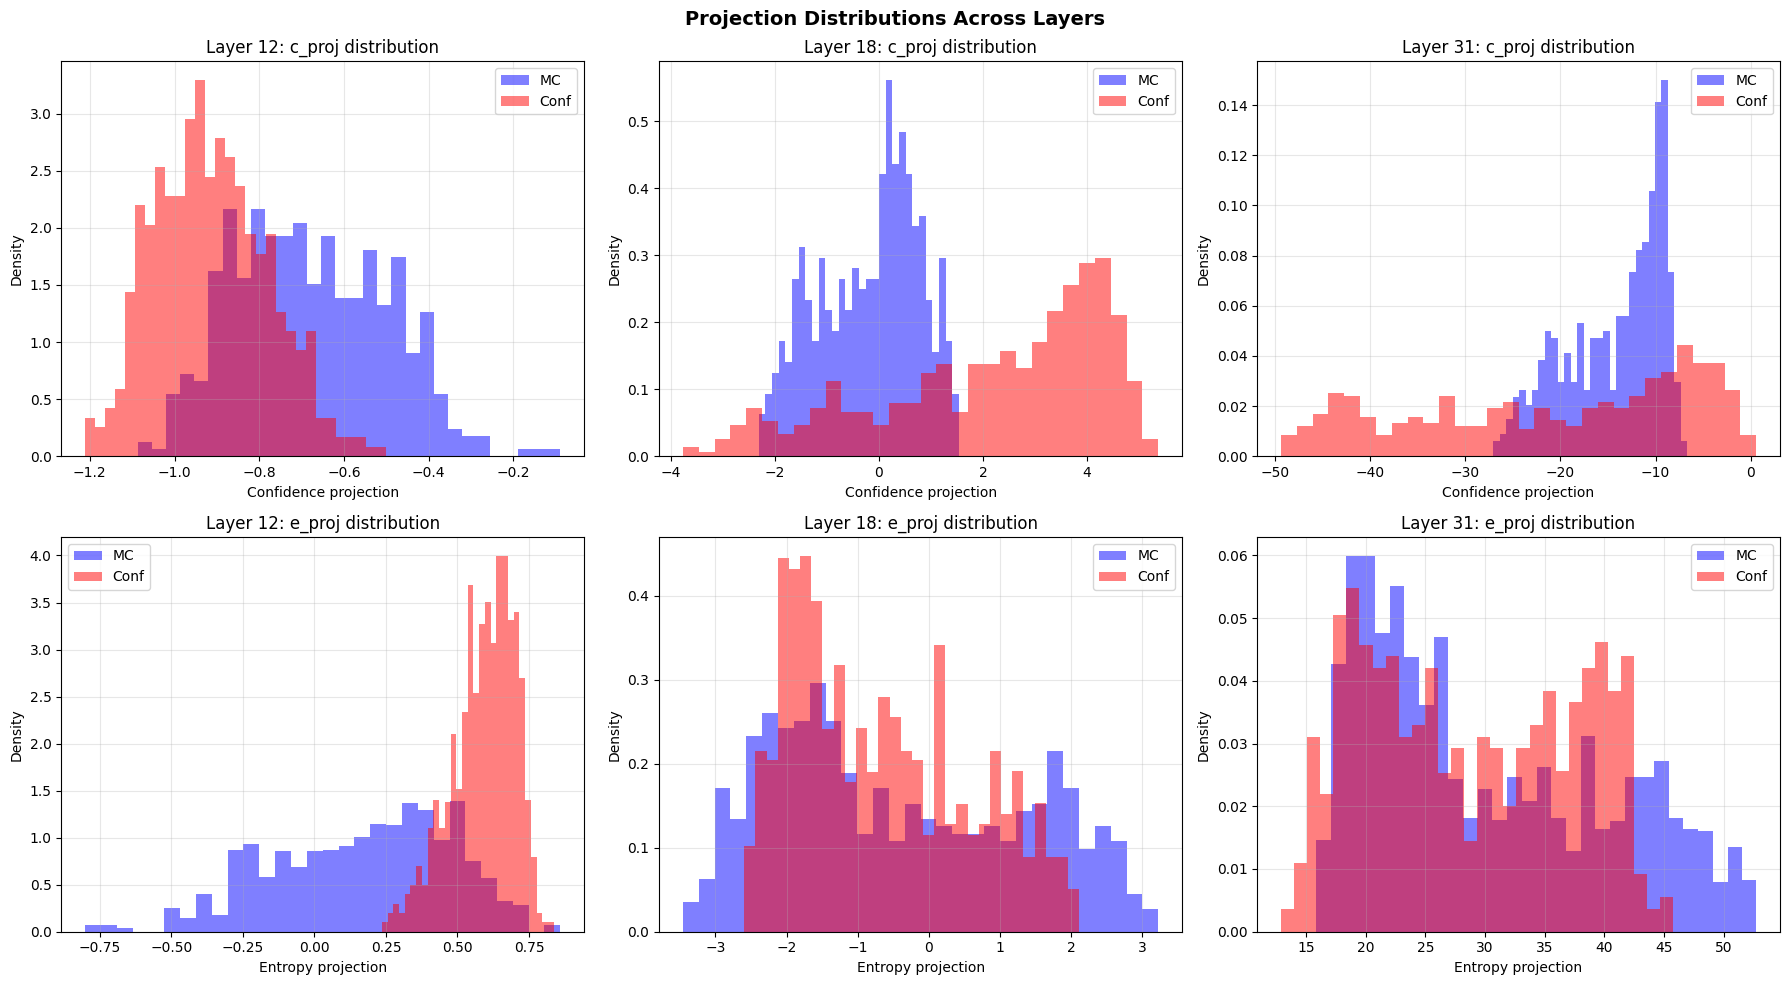

Saved projection distributions to outputs/npz_projection_distributions.png


In [27]:
# Additional visualizations: projection distributions

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Projection Distributions Across Layers", fontsize=14, fontweight="bold")

# Select a few representative layers for visualization
viz_layers = [focus_layers_valid[0], focus_layers_valid[len(focus_layers_valid)//2], focus_layers_valid[-1]] if len(focus_layers_valid) >= 3 else focus_layers_valid

for idx, layer in enumerate(viz_layers):
    # Confidence projection distributions
    ax = axes[0, idx]
    mc_c = df_wide[f"mc_L{layer}_c"]
    conf_c = df_wide[f"conf_L{layer}_c"]
    
    ax.hist(mc_c, bins=30, alpha=0.5, label="MC", color="blue", density=True)
    ax.hist(conf_c, bins=30, alpha=0.5, label="Conf", color="red", density=True)
    ax.set_xlabel("Confidence projection")
    ax.set_ylabel("Density")
    ax.set_title(f"Layer {layer}: c_proj distribution")
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Entropy projection distributions
    ax = axes[1, idx]
    mc_e = df_wide[f"mc_L{layer}_e"]
    conf_e = df_wide[f"conf_L{layer}_e"]
    
    ax.hist(mc_e, bins=30, alpha=0.5, label="MC", color="blue", density=True)
    ax.hist(conf_e, bins=30, alpha=0.5, label="Conf", color="red", density=True)
    ax.set_xlabel("Entropy projection")
    ax.set_ylabel("Density")
    ax.set_title(f"Layer {layer}: e_proj distribution")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("outputs/npz_projection_distributions.png", dpi=200, bbox_inches="tight")
plt.show()

print("Saved projection distributions to outputs/npz_projection_distributions.png")

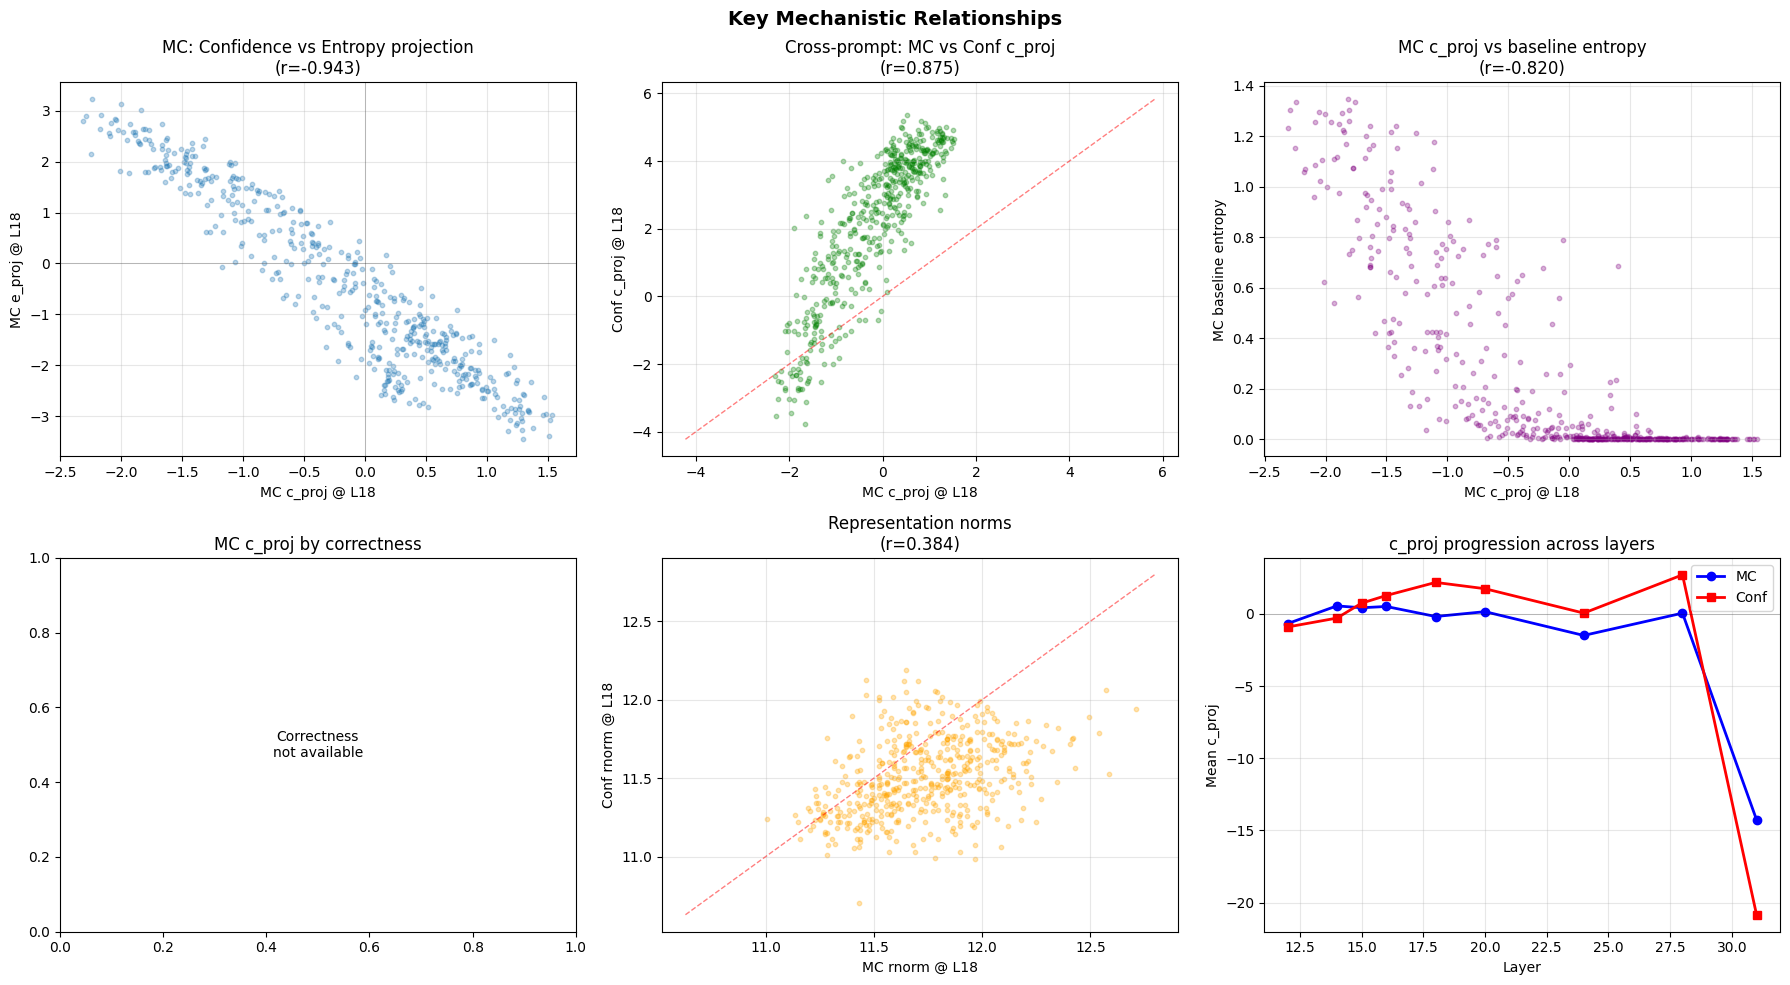

Saved mechanistic relationship plots to outputs/npz_mechanistic_relationships.png


In [28]:
# Scatter plots: key mechanistic relationships

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Key Mechanistic Relationships", fontsize=14, fontweight="bold")

# Use middle layer for most plots
mid_layer = focus_layers_valid[len(focus_layers_valid)//2] if focus_layers_valid else 15

# 1. MC c_proj vs MC e_proj (orthogonality check)
ax = axes[0, 0]
if f"mc_L{mid_layer}_c" in df_wide.columns and f"mc_L{mid_layer}_e" in df_wide.columns:
    mc_c = df_wide[f"mc_L{mid_layer}_c"]
    mc_e = df_wide[f"mc_L{mid_layer}_e"]
    ax.scatter(mc_c, mc_e, alpha=0.3, s=10)
    ax.set_xlabel(f"MC c_proj @ L{mid_layer}")
    ax.set_ylabel(f"MC e_proj @ L{mid_layer}")
    ax.set_title(f"MC: Confidence vs Entropy projection\n(r={np.corrcoef(mc_c, mc_e)[0,1]:.3f})")
    ax.grid(True, alpha=0.3)
    ax.axhline(0, color='black', linewidth=0.5, alpha=0.3)
    ax.axvline(0, color='black', linewidth=0.5, alpha=0.3)

# 2. MC c_proj vs CONF c_proj (cross-prompt alignment)
ax = axes[0, 1]
if f"mc_L{mid_layer}_c" in df_wide.columns and f"conf_L{mid_layer}_c" in df_wide.columns:
    mc_c = df_wide[f"mc_L{mid_layer}_c"]
    conf_c = df_wide[f"conf_L{mid_layer}_c"]
    ax.scatter(mc_c, conf_c, alpha=0.3, s=10, color='green')
    ax.set_xlabel(f"MC c_proj @ L{mid_layer}")
    ax.set_ylabel(f"Conf c_proj @ L{mid_layer}")
    ax.set_title(f"Cross-prompt: MC vs Conf c_proj\n(r={np.corrcoef(mc_c, conf_c)[0,1]:.3f})")
    ax.grid(True, alpha=0.3)
    # Add diagonal line
    lims = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(lims, lims, 'r--', alpha=0.5, linewidth=1)

# 3. MC c_proj vs baseline entropy (if available)
ax = axes[0, 2]
if "mc_entropy" in df_wide.columns and f"mc_L{mid_layer}_c" in df_wide.columns:
    mc_c = df_wide[f"mc_L{mid_layer}_c"]
    entropy = df_wide["mc_entropy"]
    ax.scatter(mc_c, entropy, alpha=0.3, s=10, color='purple')
    ax.set_xlabel(f"MC c_proj @ L{mid_layer}")
    ax.set_ylabel("MC baseline entropy")
    ax.set_title(f"MC c_proj vs baseline entropy\n(r={np.corrcoef(mc_c, entropy)[0,1]:.3f})")
    ax.grid(True, alpha=0.3)
else:
    ax.text(0.5, 0.5, "Baseline entropy\nnot available", ha='center', va='center', transform=ax.transAxes)
    ax.set_title("MC c_proj vs baseline entropy")

# 4. MC c_proj by correctness (if available)
ax = axes[1, 0]
if "mc_correct" in df_wide.columns and f"mc_L{mid_layer}_c" in df_wide.columns:
    mc_c = df_wide[f"mc_L{mid_layer}_c"]
    correct = df_wide["mc_correct"].astype(bool)
    
    ax.violinplot([mc_c[~correct], mc_c[correct]], positions=[0, 1], showmeans=True, showextrema=True)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Incorrect", "Correct"])
    ax.set_ylabel(f"MC c_proj @ L{mid_layer}")
    
    # Add mean difference
    mean_diff = mc_c[correct].mean() - mc_c[~correct].mean()
    ax.set_title(f"MC c_proj by correctness\n(Δmean={mean_diff:+.3f})")
    ax.grid(True, alpha=0.3, axis='y')
else:
    ax.text(0.5, 0.5, "Correctness\nnot available", ha='center', va='center', transform=ax.transAxes)
    ax.set_title("MC c_proj by correctness")

# 5. Representation norms comparison
ax = axes[1, 1]
if f"mc_L{mid_layer}_rnorm" in df_wide.columns and f"conf_L{mid_layer}_rnorm" in df_wide.columns:
    mc_rnorm = df_wide[f"mc_L{mid_layer}_rnorm"]
    conf_rnorm = df_wide[f"conf_L{mid_layer}_rnorm"]
    ax.scatter(mc_rnorm, conf_rnorm, alpha=0.3, s=10, color='orange')
    ax.set_xlabel(f"MC rnorm @ L{mid_layer}")
    ax.set_ylabel(f"Conf rnorm @ L{mid_layer}")
    ax.set_title(f"Representation norms\n(r={np.corrcoef(mc_rnorm, conf_rnorm)[0,1]:.3f})")
    ax.grid(True, alpha=0.3)
    # Add diagonal
    lims = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(lims, lims, 'r--', alpha=0.5, linewidth=1)

# 6. Layer progression: how c_proj evolves
ax = axes[1, 2]
# Plot mean c_proj across layers
mc_c_means = [df_wide[f"mc_L{l}_c"].mean() for l in focus_layers_valid if f"mc_L{l}_c" in df_wide.columns]
conf_c_means = [df_wide[f"conf_L{l}_c"].mean() for l in focus_layers_valid if f"conf_L{l}_c" in df_wide.columns]
valid_layers = [l for l in focus_layers_valid if f"mc_L{l}_c" in df_wide.columns]

if mc_c_means and conf_c_means:
    ax.plot(valid_layers, mc_c_means, 'o-', label="MC", color='blue', linewidth=2)
    ax.plot(valid_layers, conf_c_means, 's-', label="Conf", color='red', linewidth=2)
    ax.set_xlabel("Layer")
    ax.set_ylabel("Mean c_proj")
    ax.set_title("c_proj progression across layers")
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axhline(0, color='black', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig("outputs/npz_mechanistic_relationships.png", dpi=200, bbox_inches="tight")
plt.show()

print("Saved mechanistic relationship plots to outputs/npz_mechanistic_relationships.png")

In [29]:
# Summary: Interpretation guide

print("\n" + "="*70)
print("INTERPRETATION GUIDE")
print("="*70)

print("""
This section analyzed representation geometry using saved activations:

KEY FINDINGS TO LOOK FOR:

1. ORTHOGONALITY: corr(MC c_proj, MC e_proj)
   - Near zero → directions are orthogonal (good separation)
   - Positive → directions partially aligned
   - Negative → directions anti-aligned (unexpected)

2. CROSS-PROMPT ALIGNMENT: corr(MC c_proj, CONF c_proj) at same layer
   - High positive → confidence representation is consistent across prompts
   - Low/zero → prompt-dependent representations
   - This tests whether the model uses the same "confidence circuit"

3. GROUNDING IN UNCERTAINTY: corr(MC c_proj, baseline entropy)
   - Strong correlation → confidence projection captures actual uncertainty
   - Weak → confidence direction may capture something else

4. CORRECTNESS SIGNAL: MC c_proj difference for correct vs incorrect
   - Positive Δ → model has higher confidence projection when correct
   - Zero → confidence projection doesn't distinguish correctness

5. LAYER PROGRESSION:
   - Early layers: representations forming
   - Middle layers: peak correlation with task-relevant features
   - Late layers: projections may stabilize or diverge

WHAT MAKES A GOOD CONFIDENCE DIRECTION:
✓ High cross-prompt alignment (consistent representation)
✓ Strong correlation with baseline uncertainty
✓ Clear separation by correctness
✓ Orthogonal to entropy direction (if measuring different aspects)

WHAT TO INVESTIGATE IF RESULTS ARE WEAK:
- Check if directions were learned on same model/dataset
- Verify token position alignment (final vs other positions)
- Look for layer-specific effects (some layers may work better)
- Consider whether example sets match between MC and Conf prompts
""")

print("\n" + "="*70)
print("FILES CREATED")
print("="*70)
print("  CSV outputs:")
print("    - outputs/npz_projection_long.csv")
print("    - outputs/npz_projection_wide.csv")
print("    - outputs/npz_correlation_mc.csv")
print("    - outputs/npz_correlation_conf.csv")
print("    - outputs/npz_correlation_all.csv")
print("\n  Visualizations:")
print("    - outputs/npz_projection_correlations.png")
print("    - outputs/npz_projection_distributions.png")
print("    - outputs/npz_mechanistic_relationships.png")
print("="*70)


INTERPRETATION GUIDE

This section analyzed representation geometry using saved activations:

KEY FINDINGS TO LOOK FOR:

1. ORTHOGONALITY: corr(MC c_proj, MC e_proj)
   - Near zero → directions are orthogonal (good separation)
   - Positive → directions partially aligned
   - Negative → directions anti-aligned (unexpected)

2. CROSS-PROMPT ALIGNMENT: corr(MC c_proj, CONF c_proj) at same layer
   - High positive → confidence representation is consistent across prompts
   - Low/zero → prompt-dependent representations
   - This tests whether the model uses the same "confidence circuit"

3. GROUNDING IN UNCERTAINTY: corr(MC c_proj, baseline entropy)
   - Strong correlation → confidence projection captures actual uncertainty
   - Weak → confidence direction may capture something else

4. CORRECTNESS SIGNAL: MC c_proj difference for correct vs incorrect
   - Positive Δ → model has higher confidence projection when correct
   - Zero → confidence projection doesn't distinguish correctness

5.